## IMPORTING NECESSARY LIBRARIES


In [2]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Natural Language Processing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# For interactive widgets (if needed)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Display options
pd.set_option('display.max_columns', None)  # To display all columns of a DataFrame

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

!pip install matplotlib seaborn wordcloud
from wordcloud import WordCloud, STOPWORDS

from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
from scipy.stats import mannwhitneyu, wilcoxon, kruskal, spearmanr, kendalltau, chi2_contingency, shapiro
import seaborn as sns

!pip install xgboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_absolute_error
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## LOADING THE DATASET

In [3]:
# Load the dataset
df = pd.read_csv('amazon.csv')

# DATA PREPROCESSING

In [4]:
# Display the first few rows
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [5]:
# Get the number of rows in the dataset
num_rows = df.shape[0]
num_rows

1465

In [6]:
df.shape

(1465, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [9]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

## CHANGING DATA TYPE OF COLUMNS FROM OBJECT TO FLOAT

In [10]:
#Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [11]:
#Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [12]:
#Finding unusual string in the rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4      181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3        4
3.1      4
5        3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
2.6      1
2.9      1
Name: count, dtype: int64

In [13]:
'''
# Sample data
data = {
    'rating': ['4.1', '4.3', '4.2', '4.0', '3.9', '4.4', '3.8', '4.5', '4', '3.7', '3.6', '3.5', '4.6', '3.3', '3.4', '4.7', '3.1', '5.0', '3.0', '4.8', '3.2', '2.8', '2.3', '|', '2', '3', '2.6', '2.9'],
    'count': [244, 230, 228, 129, 123, 123, 86, 75, 52, 42, 35, 26, 17, 16, 10, 6, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Separate usual ratings and the unusual string
numeric_ratings = df[df['rating'] != '|']
unusual_rating = df[df['rating'] == '|']

# Convert ratings to numeric for proper sorting
numeric_ratings['rating'] = numeric_ratings['rating'].astype(float)

# Sort the numeric ratings
numeric_ratings = numeric_ratings.sort_values('rating')

# Plot
plt.figure(figsize=(12, 6))

# Plot numeric ratings
plt.bar(numeric_ratings['rating'].astype(str), numeric_ratings['count'], color='skyblue')

# Highlight the unusual string
plt.bar(unusual_rating['rating'], unusual_rating['count'], color='red')

# Add title and labels
plt.title('Number of Occurrences for Each Rating Value')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
'''

"\n# Sample data\ndata = {\n    'rating': ['4.1', '4.3', '4.2', '4.0', '3.9', '4.4', '3.8', '4.5', '4', '3.7', '3.6', '3.5', '4.6', '3.3', '3.4', '4.7', '3.1', '5.0', '3.0', '4.8', '3.2', '2.8', '2.3', '|', '2', '3', '2.6', '2.9'],\n    'count': [244, 230, 228, 129, 123, 123, 86, 75, 52, 42, 35, 26, 17, 16, 10, 6, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1]\n}\n\n# Create DataFrame\ndf = pd.DataFrame(data)\n\n# Separate usual ratings and the unusual string\nnumeric_ratings = df[df['rating'] != '|']\nunusual_rating = df[df['rating'] == '|']\n\n# Convert ratings to numeric for proper sorting\nnumeric_ratings['rating'] = numeric_ratings['rating'].astype(float)\n\n# Sort the numeric ratings\nnumeric_ratings = numeric_ratings.sort_values('rating')\n\n# Plot\nplt.figure(figsize=(12, 6))\n\n# Plot numeric ratings\nplt.bar(numeric_ratings['rating'].astype(str), numeric_ratings['count'], color='skyblue')\n\n# Highlight the unusual string\nplt.bar(unusual_rating['rating'], unusual_rating['count'], color

In [14]:
#Inspecting the strange row
df.query('rating == "|"')

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating rating_count  \
1279        2499.0                 0.16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1279  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1279  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...

In [15]:
#Changing Rating Columns Data Type

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

In [16]:
#Changing Rating Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

## CHECKING OUTLIERS

In [17]:
# Function to calculate IQR and detect outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Apply the function to relevant columns
price_outliers = detect_outliers_iqr(df['discounted_price'])
rating_outliers = detect_outliers_iqr(df['rating'])

# Display the outliers
print("Discounted Price Outliers:\n", price_outliers)
print("\nRating Outliers:\n", rating_outliers)

# Remove the outliers
df_no_outliers = df[~df['discounted_price'].isin(price_outliers) & ~df['rating'].isin(rating_outliers)]

# Display the dataset before and after removing outliers
print("\nDataset with Outliers:\n", df)
print("\nDataset without Outliers:\n", df_no_outliers)

# Display basic statistics to see the effect of removing outliers
print("\nStatistics with Outliers:\n", df.describe())
print("\nStatistics without Outliers:\n", df_no_outliers.describe())



Discounted Price Outliers:
 16      13999.0
19      13490.0
22      13490.0
24      11499.0
26      14999.0
         ...   
1428     6120.0
1430    18999.0
1432     5999.0
1437     6199.0
1438     6790.0
Name: discounted_price, Length: 217, dtype: float64

Rating Outliers:
 45      3.3
82      3.4
117     3.5
142     3.2
154     3.4
       ... 
1446    3.5
1449    2.9
1454    3.5
1456    3.2
1459    3.1
Name: rating, Length: 74, dtype: float64

Dataset with Outliers:
       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 

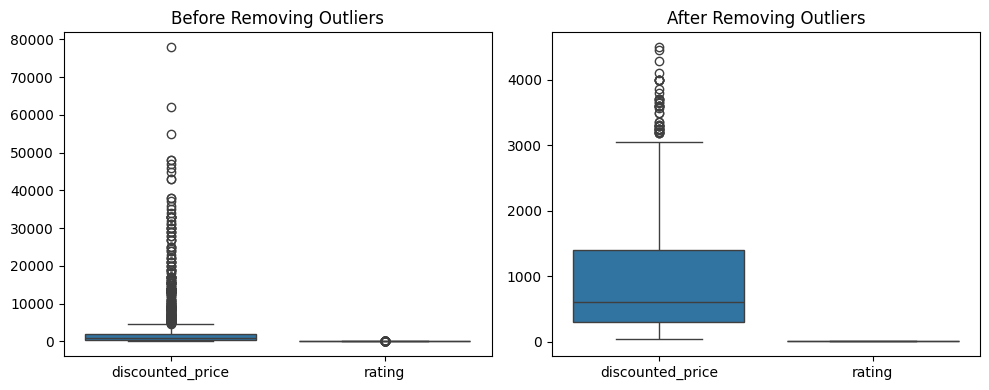

In [18]:
# Plot the outliers before and after removing them
plt.figure(figsize=(10, 4))

# Plot before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['discounted_price', 'rating']])
plt.title('Before Removing Outliers')

# Plot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers[['discounted_price', 'rating']])
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()


In [19]:
# Create a rating_rank list based on the rating score
rating_rank = []

for score in df['rating']:
    if score <= 0.9:
        rating_rank.append('Very Poor')
    elif score <= 1.9:
        rating_rank.append('Poor')
    elif score <= 2.9:
        rating_rank.append('Average')
    elif score <= 3.9:
        rating_rank.append('Good')
    elif score <= 4.9:
        rating_rank.append('Very Good')
    elif score == 5.0:
        rating_rank.append('Excellent')

# Add the rating_rank list as a ranking column in the dataframe
df['rating_rank'] = rating_rank

# Convert the ranking column to a categorical data type
df['rating_rank'] = df['rating_rank'].astype('category')

# Display the dataframe with the new column
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2       24269.0   
1         349.0       

In [20]:
#Checking for Duplicates
duplicates = df.duplicated()
df[duplicates]

Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link, rating_rank]
Index: []

## Discriptive Statistics

In [21]:
# Basic statistics
print(df.describe())


       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096519   
std         6944.304394   10874.826864             0.216359     0.291585   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000  


In [22]:
# Check for missing values
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
rating_rank            0
dtype: int64


In [23]:
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False) 

rating_count           0.14
product_id             0.00
user_id                0.00
product_link           0.00
img_link               0.00
review_content         0.00
review_title           0.00
review_id              0.00
user_name              0.00
about_product          0.00
product_name           0.00
rating                 0.00
discount_percentage    0.00
actual_price           0.00
discounted_price       0.00
category               0.00
rating_rank            0.00
dtype: float64

In [24]:
# Find total number of missing values
df.isnull().sum().sum()

2

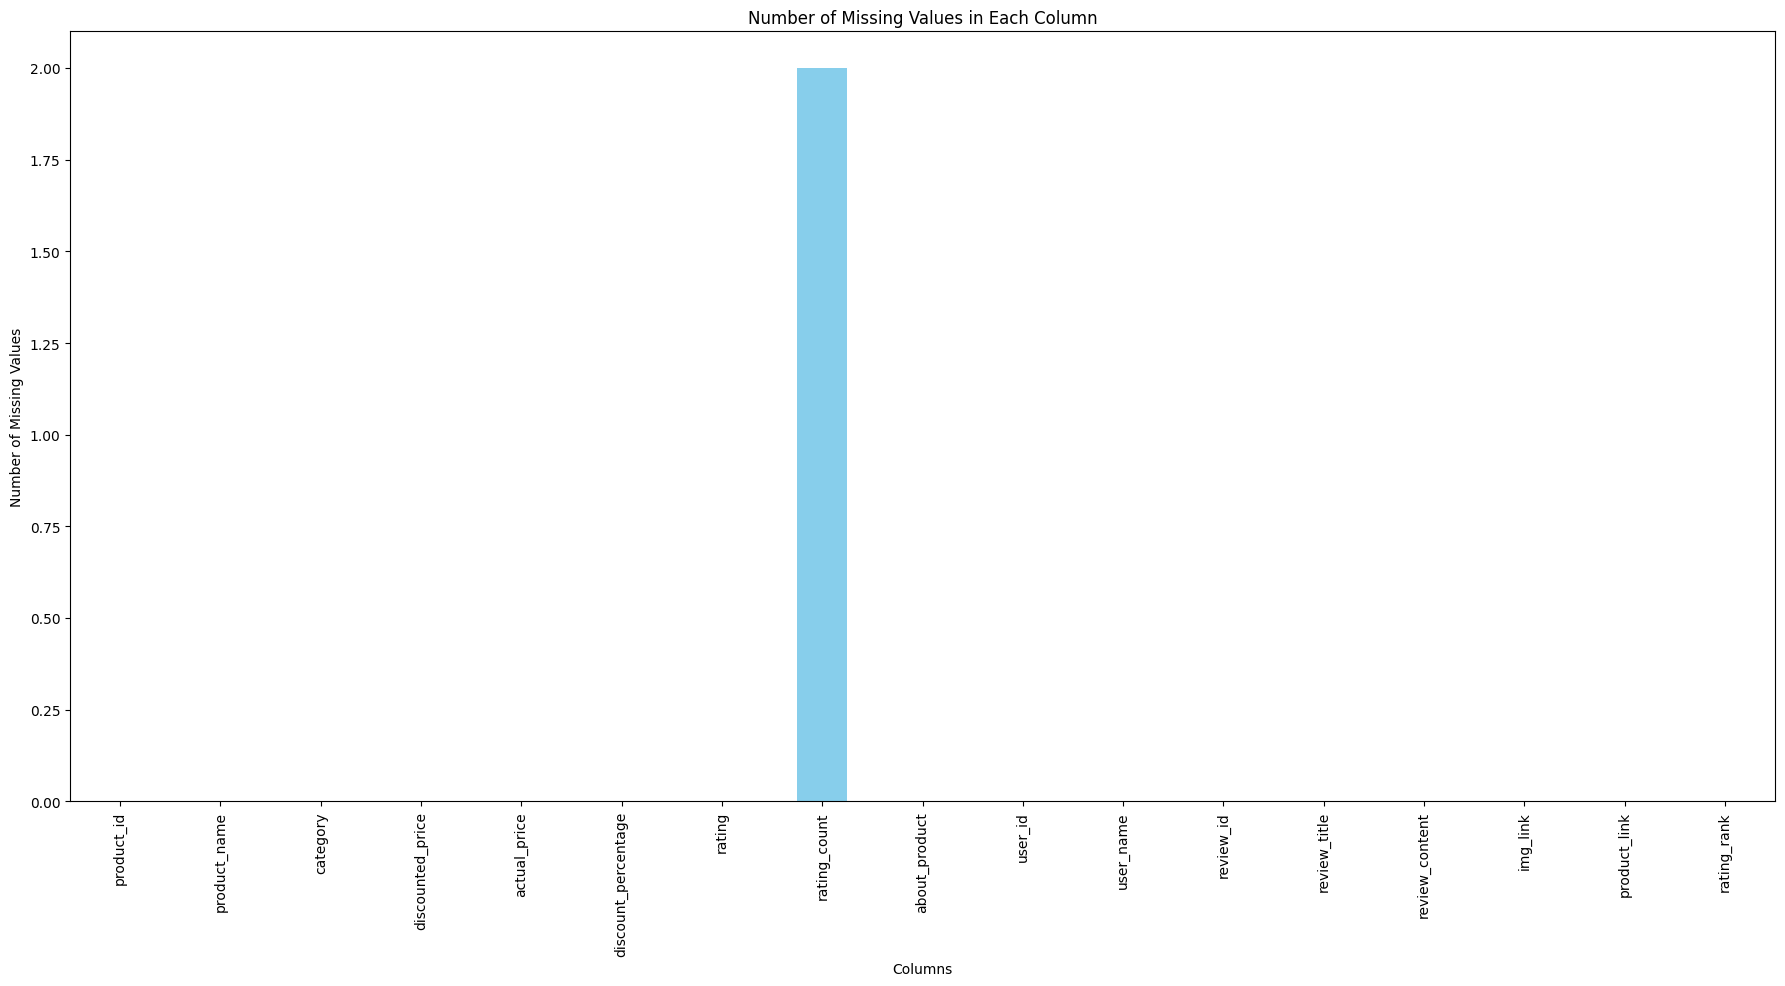

In [25]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()
# Create a bar plot
plt.figure(figsize=(22, 10))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [26]:
df[df['rating_count'].isnull()].head(5)

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category  discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             199.0   
324  Computers&Accessories|Accessories&Peripherals|...             249.0   

     actual_price  discount_percentage  rating  rating_count  \
282         999.0                 0.80     3.0           NaN   
324         999.0                 0.75     5.0           NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link rating_rank  
282  https://www.amazon.in/Amazon-Brand-Charging-Su...        Good  
324  https://www.amazon.in/REDTECH-Lightning-Certif...   Excellent

In [27]:
 # Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [28]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
user_id                0
product_link           0
img_link               0
review_content         0
review_title           0
review_id              0
user_name              0
about_product          0
product_name           0
rating_count           0
rating                 0
discount_percentage    0
actual_price           0
discounted_price       0
category               0
rating_rank            0
dtype: int64

## Finding Duplicates

In [29]:
# Find Duplicate
df.duplicated().any()

False

In [30]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_rank'],
      dtype='object')

In [31]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()
any_duplicates

False

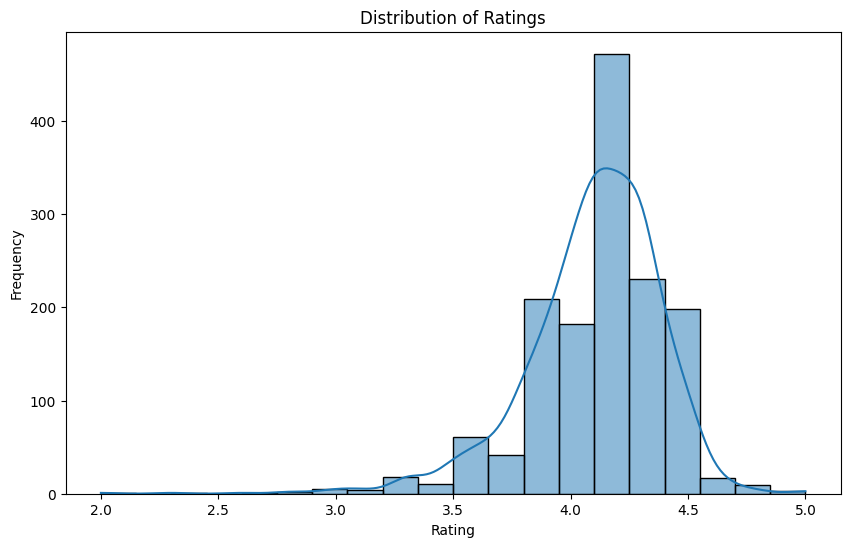

In [32]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [33]:
#Creating a new DataFrame with Selected Column
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [34]:
#Splitting the Strings in the category column
categorysplit = df['category'].str.split('|', expand=True)
categorysplit

0                           1  \
0     Computers&Accessories     Accessories&Peripherals   
1     Computers&Accessories     Accessories&Peripherals   
2     Computers&Accessories     Accessories&Peripherals   
3     Computers&Accessories     Accessories&Peripherals   
4     Computers&Accessories     Accessories&Peripherals   
...                     ...                         ...   
1460           Home&Kitchen      Kitchen&HomeAppliances   
1461           Home&Kitchen      Kitchen&HomeAppliances   
1462           Home&Kitchen  Heating,Cooling&AirQuality   
1463           Home&Kitchen  Heating,Cooling&AirQuality   
1464           Home&Kitchen      Kitchen&HomeAppliances   

                               2                         3          4     5  \
0             Cables&Accessories                    Cables  USBCables  None   
1             Cables&Accessories                    Cables  USBCables  None   
2             Cables&Accessories                    Cables  USBCables  None   
3             Cables&Accessories                    Cables  USBCables  None   
4             Cables&Accessories                    Cables  USBCables  None   
...                          ...                       ...        ...   ...   
1460  WaterPurifiers&Accessories  WaterPurifierAccessories       None  None   
1461      SmallKitchenAppliances         Rice&PastaCookers       None  None   
1462                 RoomHeaters            HeatConvectors       None  None   
1463                        Fans               ExhaustFans       None  None   
1464      SmallKitchenAppliances            SandwichMakers       None  None   

         6  
0     None  
1     None  
2     None  
3     None  
4     None  
...    ...  
1460  None  
1461  None  
1462  None  
1463  None  
1464  None  

[1465 rows x 7 columns]

In [35]:
#Renaming category column
categorysplit = categorysplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [36]:
#Adding categories to the new dataframe

df1['category_1'] = categorysplit['category_1']
df1['category_2'] = categorysplit['category_2']

df1.drop(columns='category', inplace=True)

df1

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

      discounted_price  actual_price  discount_percentage  rating  \
0                399.0        1099.0                 0.64     4.2   
1                199.0         349.0                 0.43     4.0   
2                199.0        1899.0                 0.90     3.9   
3                329.0         699.0                 0.53     4.2   
4                154.0         399.0                 0.61     4.2   
...                ...           ...                  ...     ...   
1460             379.0         919.0                 0.59     4.0   
1461            2280.0        3045.0                 0.25     4.1   
1462            2219.0        3080.0                 0.28     3.6   
1463            1399.0        1890.0                 0.26     4.0   
1464            2863.0        3690.0                 0.22     4.3   

      rating_count             category_1                  category_2  
0          24269.0  Computers&Accessories     Accessories&Peripherals  
1          43994.0  Computers&Accessories     Accessories&Peripherals  
2           7928.0  Computers&Accessories     Accessories&Peripherals  
3          94363.0  Computers&Accessories     Accessories&Peripherals  
4          16905.0  Computers&Accessories     Accessories&Peripherals  
...            ...                    ...                         ...  
1460        1090.0           Home&Kitchen      Kitchen&HomeAppliances  
1461        4118.0           Home&Kitchen      Kitchen&HomeAppliances  
1462         468.0           Home&Kitchen  Heating,Cooling&AirQuality  
1463        8031.0           Home&Kitchen  Heating,Cooling&AirQuality  
1464        6987.0           Home&Kitchen      Kitchen&HomeAppliances  

[1465 rows x 9 columns]

In [37]:
#Checking category_1 unique values

df1['category_1'].value_counts()

category_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [38]:
#Fixing Strings in the Category_1 Column

df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [39]:
#Checking category_2 unique values

df1['category_2'].value_counts()

category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Mi

In [40]:
#Fixing Strings in Category_2 column

df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

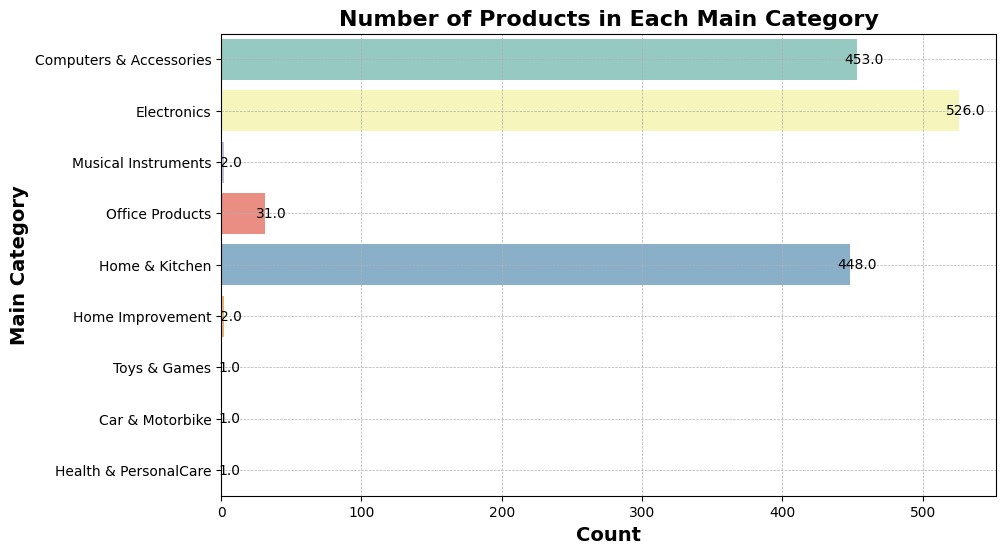

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='category_1', data=df1, palette='Set3')
plt.title('Number of Products in Each Main Category', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Main Category', fontsize=14, fontweight='bold')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


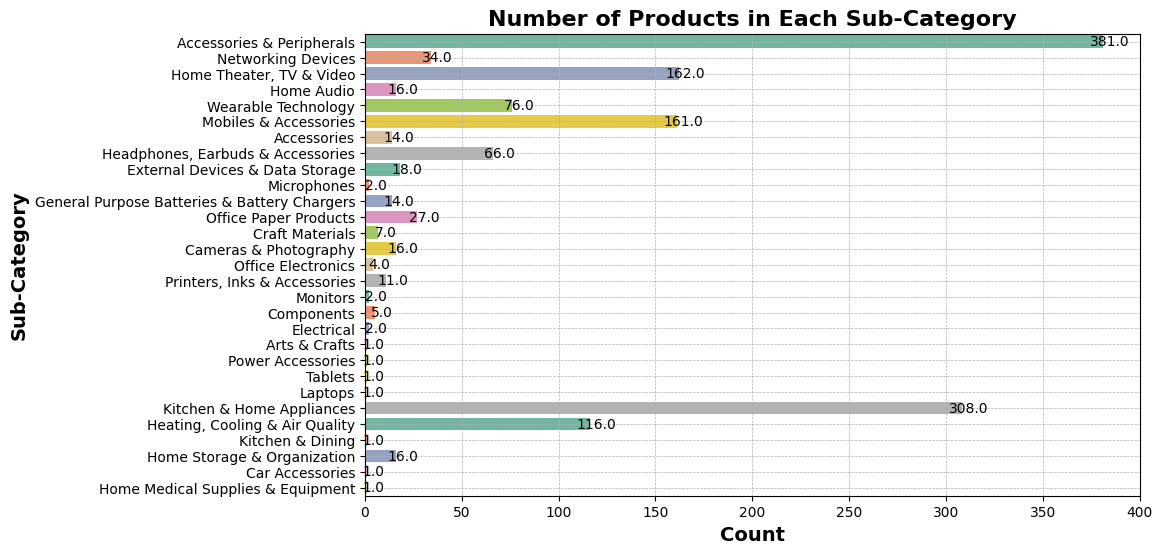

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='category_2', data=df1, palette='Set2')
plt.title('Number of Products in Each Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Sub-Category', fontsize=14, fontweight='bold')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


## DATA CLEANING

In [43]:
# Removing Whitespace from product_id
df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

## CREATING NEW COLUMN


In [44]:
#Creating Categories for Rankings

rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [45]:
#Creating A new Column and Changing the Data Type

df1['rating_score'] = rating_score

df1['rating_score'] = df1['rating_score'].astype('category')

In [46]:
#Reordered Categories

df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [47]:
#Creating Difference of Price Column between Actual Price and Discounted Price

df1['difference_of_price'] = df1['actual_price'] - df1['discounted_price']

In [48]:
#Result After Cleaning and Preperation after first cleaned dataframe

df1.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             399.0        1099.0                 0.64     4.2       24269.0   
1             199.0         349.0                 0.43     4.0       43994.0   
2             199.0        1899.0                 0.90     3.9        7928.0   
3             329.0         699.0                 0.53     4.2       94363.0   
4             154.0         399.0                 0.61     4.2       16905.0   

                category_1                 category_2   rating_score  \
0  Computers & Accessories  Accessories & Peripherals  Above Average   
1  Computers & Accessories  Accessories & Peripherals  Above Average   
2  Computers & Accessories  Accessories & Peripherals        Average   
3  Computers & Accessories  Accessories & Peripherals  Above Average   
4  Computers & Accessories  Accessories & Peripherals  Above Average   

   difference_of_price  
0                700.0  
1                150.0  
2               1700.0  
3                370.0  
4                245.0

In [49]:
#Subsetting Reviewers Identifications

reviewer = df[['user_id','user_name']]
reviewer

user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  
0     Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...  
1     ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...  
2     Kunal,Himanshu,viswanath,sai niharka,saqib mal...  
3     Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...  
4     rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...  
...                                                 ...  
1460  Prabha ds,Raghuram bk,Real Deal,Amazon Custome...  
1461  Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...  
1462  Nehal Desai,Danish Parwez,Amazon Customer,Amaz...  
1463  Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...  
1464  Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...  

[1465 rows x 2 columns]

In [50]:
#Splitting the strings in user_id column

reviewer_user_id_split = reviewer['user_id'].str.split(',', expand=False)

reviewer_user_id_split

0       [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1       [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2       [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3       [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4       [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
                              ...                        
1460    [AHITFY6AHALOFOHOZEOC6XBP4FEA, AFRABBODZJZQB6Z...
1461    [AFG5FM3NEMOL6BNFRV2NK5FNJCHQ, AGEINTRN6Z563RM...
1462    [AGVPWCMAHYQWJOQKMUJN4DW3KM5Q, AF4Q3E66MY4SR7Y...
1463    [AF2JQCLSCY3QJATWUNNHUSVUPNQQ, AFDMLUXC5LS5RXD...
1464    [AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA, AG7QNJ2SCS5VS5V...
Name: user_id, Length: 1465, dtype: object

In [51]:
#Making user id display 1 id per row

reviewer_user_id_exp = reviewer_user_id_split.explode()

reviewer_user_id_clean = reviewer_user_id_exp.reset_index(drop=True)

reviewer_user_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11498    AHXCDNSXAESERITAFELQABFVNLCA
11499    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11500    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11501    AEALVGXXIP46OZVXKRUXSDWZJMEA
11502    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11503, dtype: object

In [52]:
#Splitting the strings in user_name column

reviewer_user_name_split = reviewer['user_name'].str.split(',', expand=False)

reviewer_user_name_split

0       [Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...
1       [ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...
2       [Kunal, Himanshu, viswanath, sai niharka, saqi...
3       [Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...
4       [rahuls6099, Swasat Borah, Ajay Wadke, Pranali...
                              ...                        
1460    [Prabha ds, Raghuram bk, Real Deal, Amazon Cus...
1461    [Manu Bhai, Naveenpittu, Evatira Sangma, JAGAN...
1462    [Nehal Desai, Danish Parwez, Amazon Customer, ...
1463    [Shubham Dubey, E.GURUBARAN, Mayank S., eusuf ...
1464    [Rajib, Ajay B, Vikas Kahol, PARDEEP, Anindya ...
Name: user_name, Length: 1465, dtype: object

In [53]:
#Making user name display 1 id per row

review_name_exp = reviewer_user_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11510             PARDEEP
11511    Anindya Pramanik
11512         Vikas Singh
11513     Harshada Pimple
11514              Saw a.
Name: user_name, Length: 11515, dtype: object

In [54]:
#Creating 2 Data Frames to be merged

df21 = pd.DataFrame(data=reviewer_user_id_clean)
df22 = pd.DataFrame(data=reviewer_name_clean)

In [55]:
#Merging the 2 dataframe containing user_id and user_name

df2 = pd.merge(df21, df22, left_index=True, right_index=True)

In [56]:
#Final Check for the new dataframe

df2.head()

user_id       user_name
0  AG3D6O4STAQKAY2UVGEUV46KN35Q           Manav
1  AHMY5CWJMMK5BJRBBSNLYT3ONILA    Adarsh gupta
2  AHCTC6ULH4XB6YHDY6PCH2R772LQ         Sundeep
3  AGYHHIERNXKA6P5T7CZLXKVPT7IQ  S.Sayeed Ahmed
4  AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q  jaspreet singh

## DATA VISUALISATION

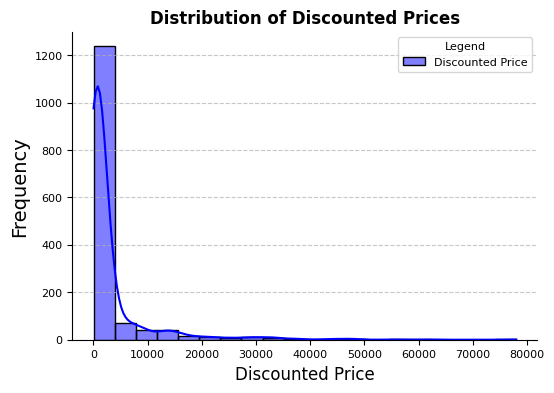

In [57]:
# Plotting the histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['discounted_price'], bins=20, kde=True, color='blue', label='Discounted Price')

# Adding titles and labels
plt.title('Distribution of Discounted Prices', fontsize=12, fontweight='bold')
plt.xlabel('Discounted Price', fontsize=12)
plt.ylabel('Frequency', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customizing tick parameters
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adding a legend
plt.legend(title='Legend', fontsize=8, title_fontsize=8, loc='upper right')

# Adding a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Showing the plot
plt.show()


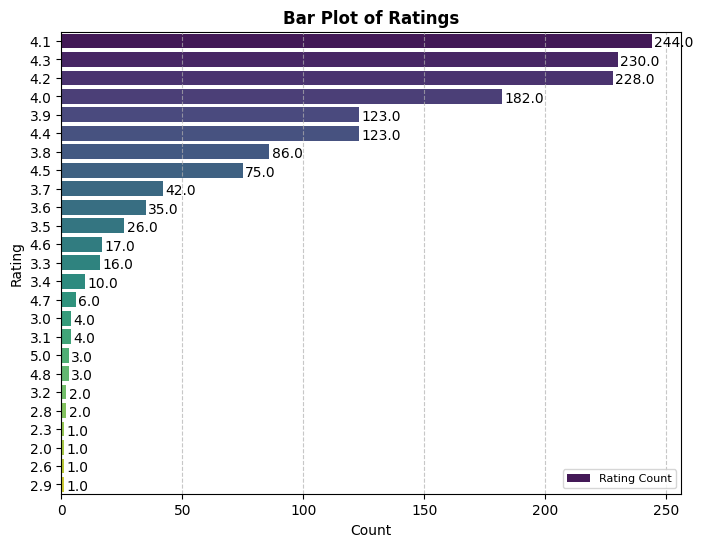

In [58]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='viridis')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + 0.5), va='center', fontsize=10, color='black')

# Adding titles and labels
plt.title('Bar Plot of Ratings', fontsize=12, fontweight='bold')
plt.xlabel('Count', fontsize=10)
plt.ylabel('Rating', fontsize=10)

# Adding grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(['Rating Count'], loc='lower right', fontsize=8)

# Showing the plot
plt.show()


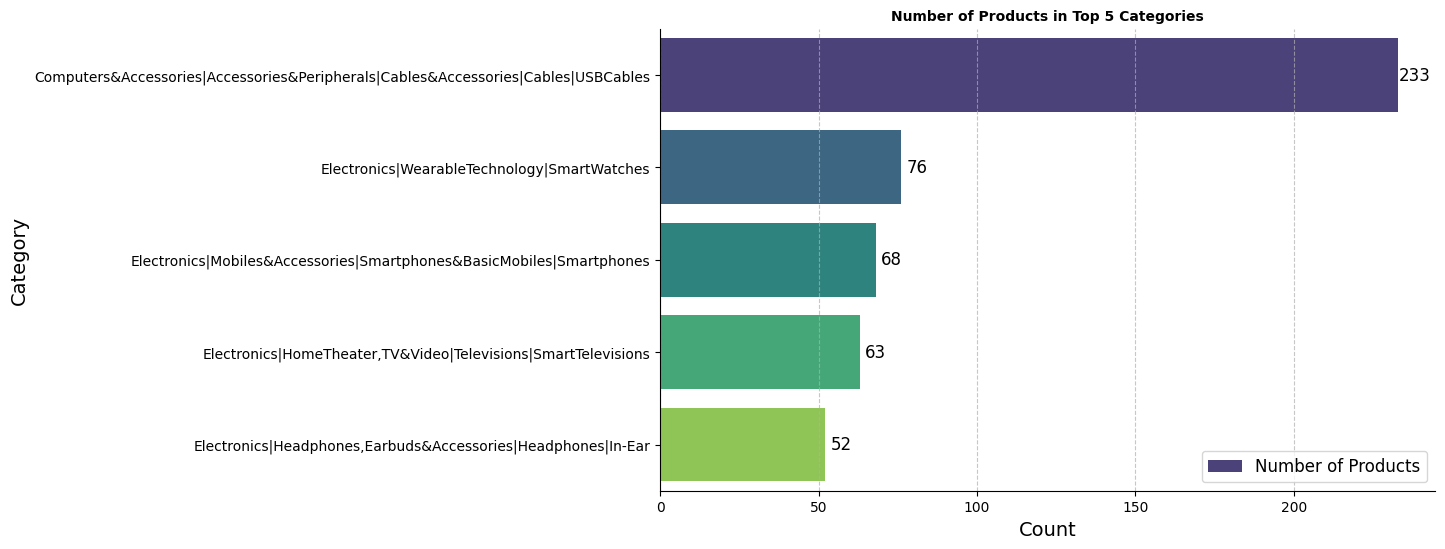

In [59]:
# Calculate the value counts for each category
category_counts = df['category'].value_counts()

# Select the top 5 categories
top_5_categories = category_counts.head(5)

plt.figure(figsize=(10, 6))
ax = sns.countplot(y=df['category'], order=top_5_categories.index, palette='viridis')

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='center', va='center', fontsize=12, color='black')

# Adding titles and labels
plt.title('Number of Products in Top 5 Categories', fontsize=10, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding a legend
plt.legend(['Number of Products'], loc='lower right', fontsize=12)

# Adding grid and removing top and right spines for better aesthetics
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


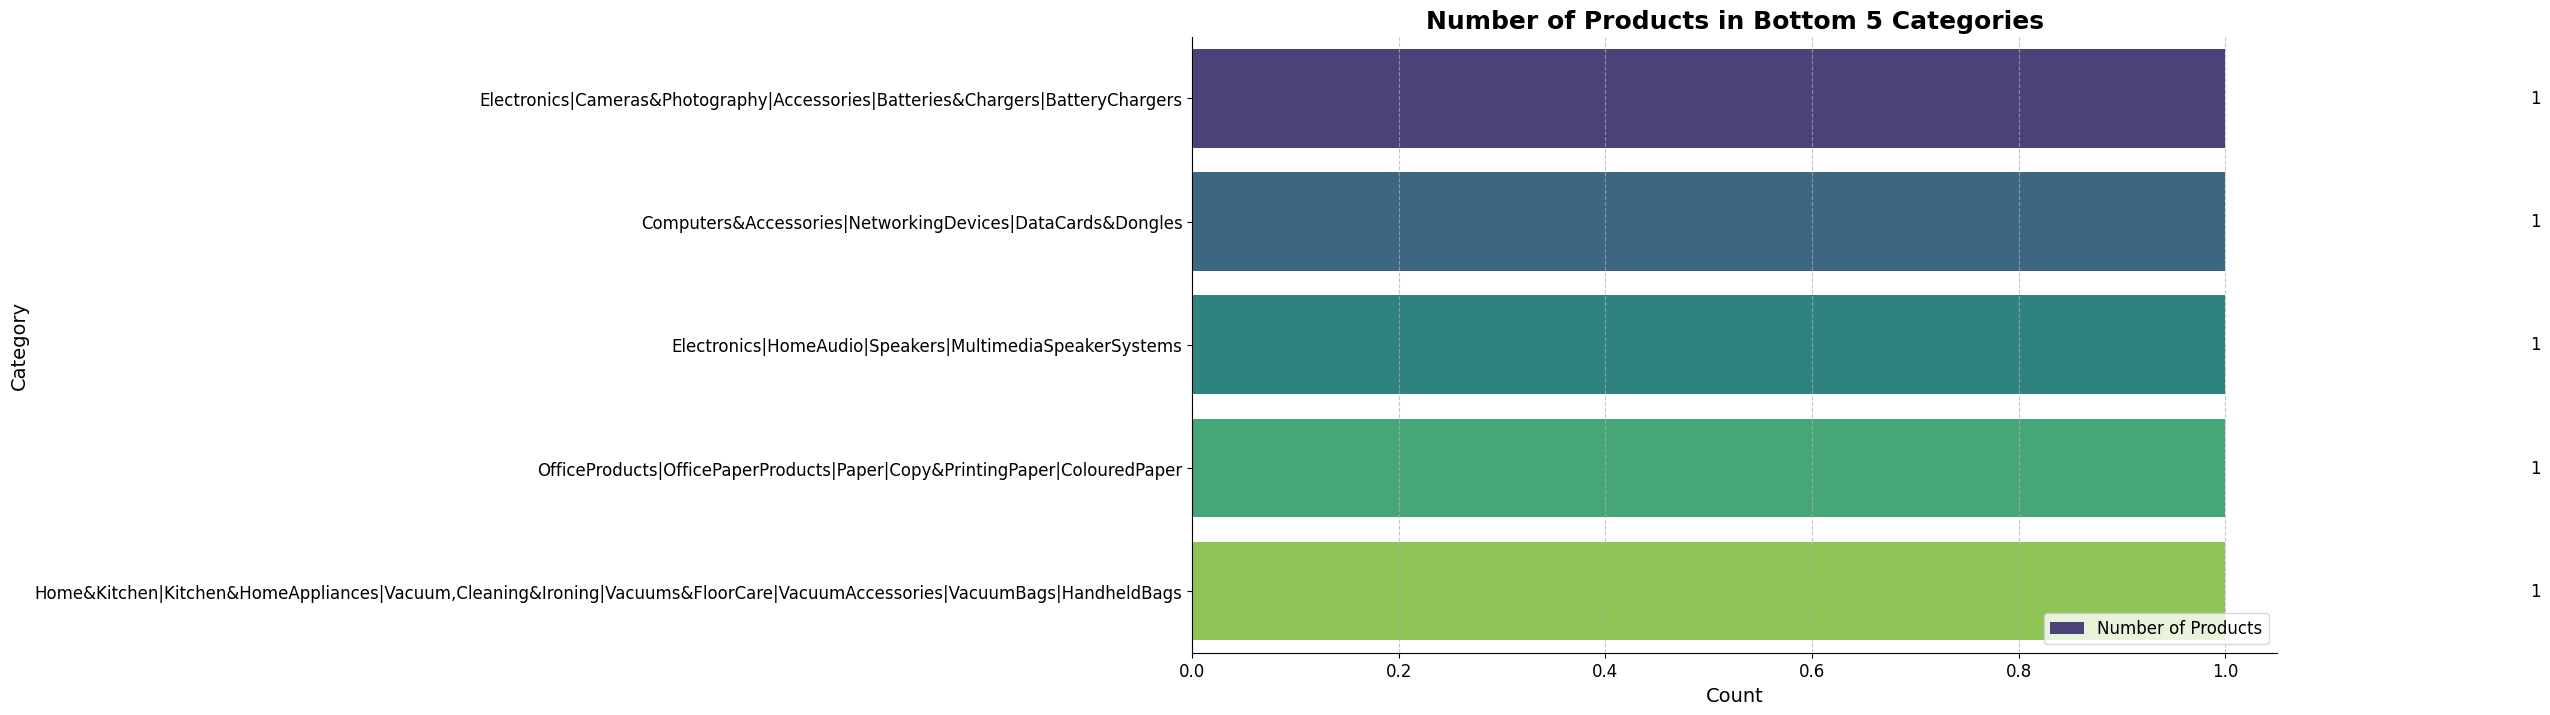

In [60]:
# Calculate the value counts for each category
category_counts = df['category'].value_counts()

# Select the bottom 5 categories
bottom_5_categories = category_counts.tail(5)

plt.figure(figsize=(14, 8))
ax = sns.countplot(y=df['category'], order=bottom_5_categories.index, palette='viridis')

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.3, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='center', va='center', fontsize=12, color='black')

# Adding titles and labels
plt.title('Number of Products in Bottom 5 Categories', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(['Number of Products'], loc='lower right', fontsize=12)

# Adding grid and removing top and right spines for better aesthetics
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

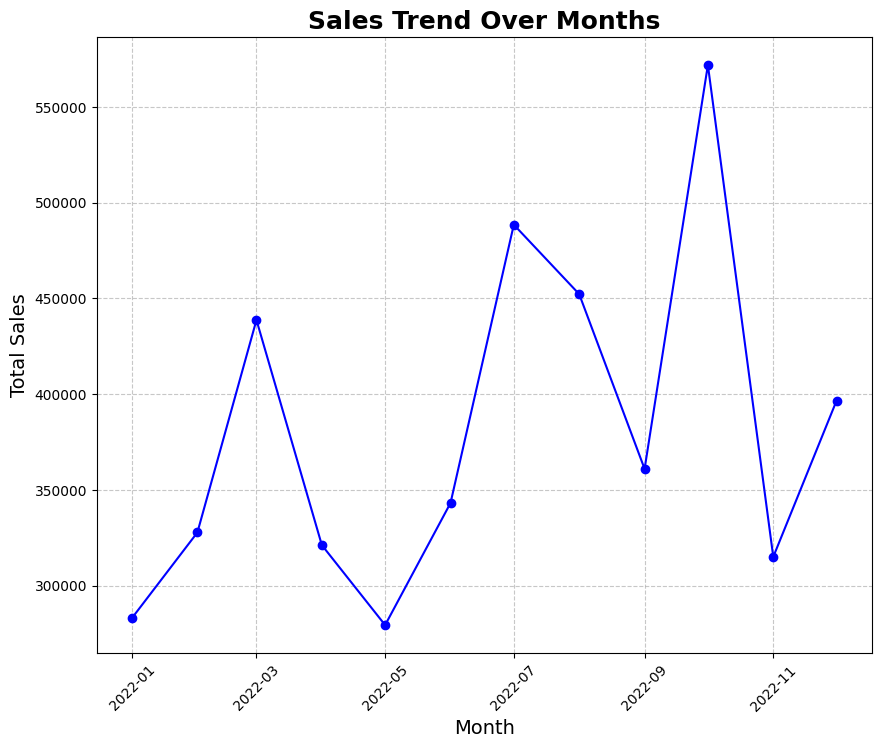

In [61]:
# Simulate a 'sales_date' column for the sake of the example
np.random.seed(0)
num_records = df.shape[0]
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', periods=num_records)
df['sales_date'] = np.random.choice(date_range, num_records)

# Assuming 'sales_date' is the column with the date of sales and 'discounted_price' represents sales amount
# If the date column is not already in datetime format, convert it
df['sales_date'] = pd.to_datetime(df['sales_date'])

# Extract month and year from the sales_date column
df['month_year'] = df['sales_date'].dt.to_period('M')

# Group by month and year and calculate total sales
monthly_sales = df.groupby('month_year')['discounted_price'].sum().reset_index()

# Convert 'month_year' back to a datetime format for plotting
monthly_sales['month_year'] = monthly_sales['month_year'].dt.to_timestamp()

# Plotting the sales trend
plt.figure(figsize=(10, 8))
plt.plot(monthly_sales['month_year'], monthly_sales['discounted_price'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Sales Trend Over Months', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()


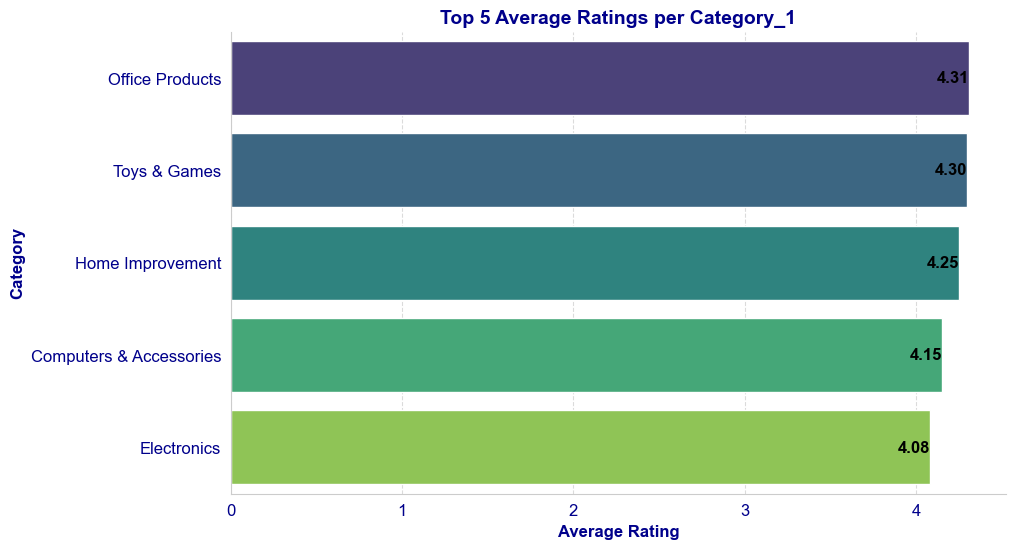

In [62]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate the mean rating
avg_ratings = df1.groupby('category_1')['rating'].mean().reset_index()

# Sort the categories by average rating for better visualization
avg_ratings = avg_ratings.sort_values(by='rating', ascending=False)

# Select top 5 categories
top_5_avg_ratings = avg_ratings.head(5)

# Set the style and color palette
sns.set_style('whitegrid')
palette = sns.color_palette("viridis", len(top_5_avg_ratings))

# Plotting the average ratings per category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='rating', y='category_1', data=top_5_avg_ratings, palette=palette)

# Adding titles and labels
plt.title('Top 5 Average Ratings per Category_1', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Category', fontsize=12, fontweight='bold', color='darkblue')

# Customize ticks and tick labels
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding data labels
for index, value in enumerate(top_5_avg_ratings['rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right', fontsize=12, color='black', weight='bold')

# Remove top and right spines for a cleaner look
sns.despine()

# Adding gridlines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Show the plot
plt.show()

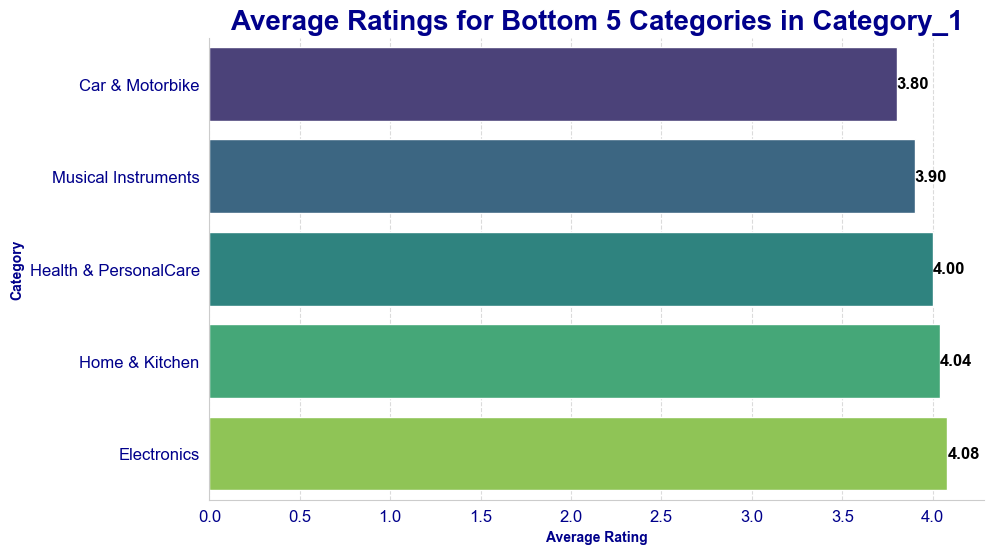

In [63]:
# Group by category and calculate the mean rating
avg_ratings = df1.groupby('category_1')['rating'].mean().reset_index()

# Sort the categories by average rating
avg_ratings = avg_ratings.sort_values(by='rating', ascending=True)

# Select bottom 5 categories
bottom_5_categories = avg_ratings.head(5)

# Plotting the bar plot for bottom 5 categories
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='rating', y='category_1', data=bottom_5_categories, palette='viridis')

# Adding data labels
for index, value in enumerate(bottom_5_categories['rating']):
    ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

# Adding titles and labels
plt.title('Average Ratings for Bottom 5 Categories in Category_1', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Average Rating', fontsize=10, fontweight='bold', color='darkblue')
plt.ylabel('Category', fontsize=10, fontweight='bold', color='darkblue')

# Customize ticks and tick labels
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Remove top and right spines for a cleaner look
sns.despine()

# Adding gridlines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Show the plot
plt.show()

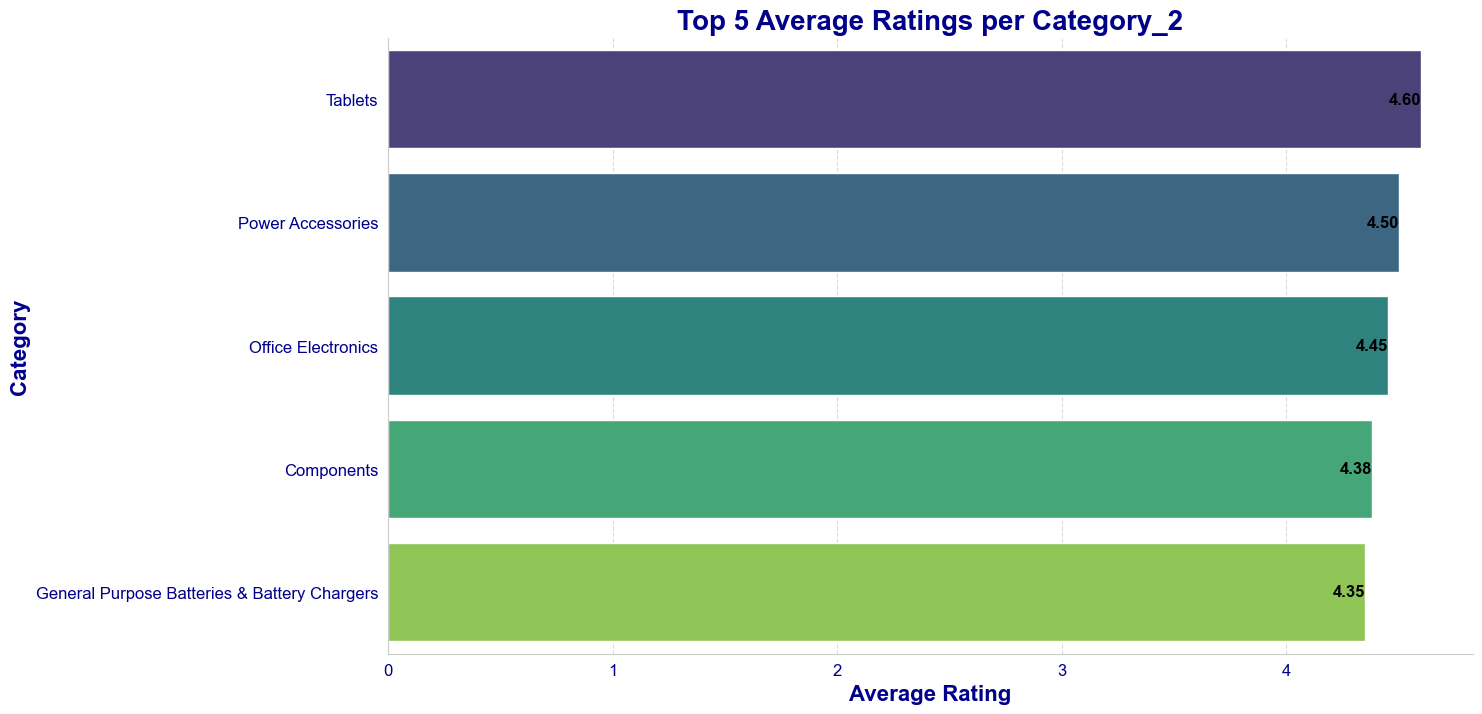

In [64]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate the mean rating
avg_ratings = df1.groupby('category_2')['rating'].mean().reset_index()

# Sort the categories by average rating for better visualization
avg_ratings = avg_ratings.sort_values(by='rating', ascending=False)

# Select top 5 categories
top_5_avg_ratings = avg_ratings.head(5)

# Set the style and color palette
sns.set_style('whitegrid')
palette = sns.color_palette("viridis", len(top_5_avg_ratings))

# Plotting the average ratings per category
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='rating', y='category_2', data=top_5_avg_ratings, palette=palette)

# Adding titles and labels
plt.title('Top 5 Average Ratings per Category_2', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Average Rating', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Category', fontsize=16, fontweight='bold', color='darkblue')

# Customize ticks and tick labels
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Adding data labels
for index, value in enumerate(top_5_avg_ratings['rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right', fontsize=12, color='black', weight='bold')

# Remove top and right spines for a cleaner look
sns.despine()

# Adding gridlines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Show the plot
plt.show()

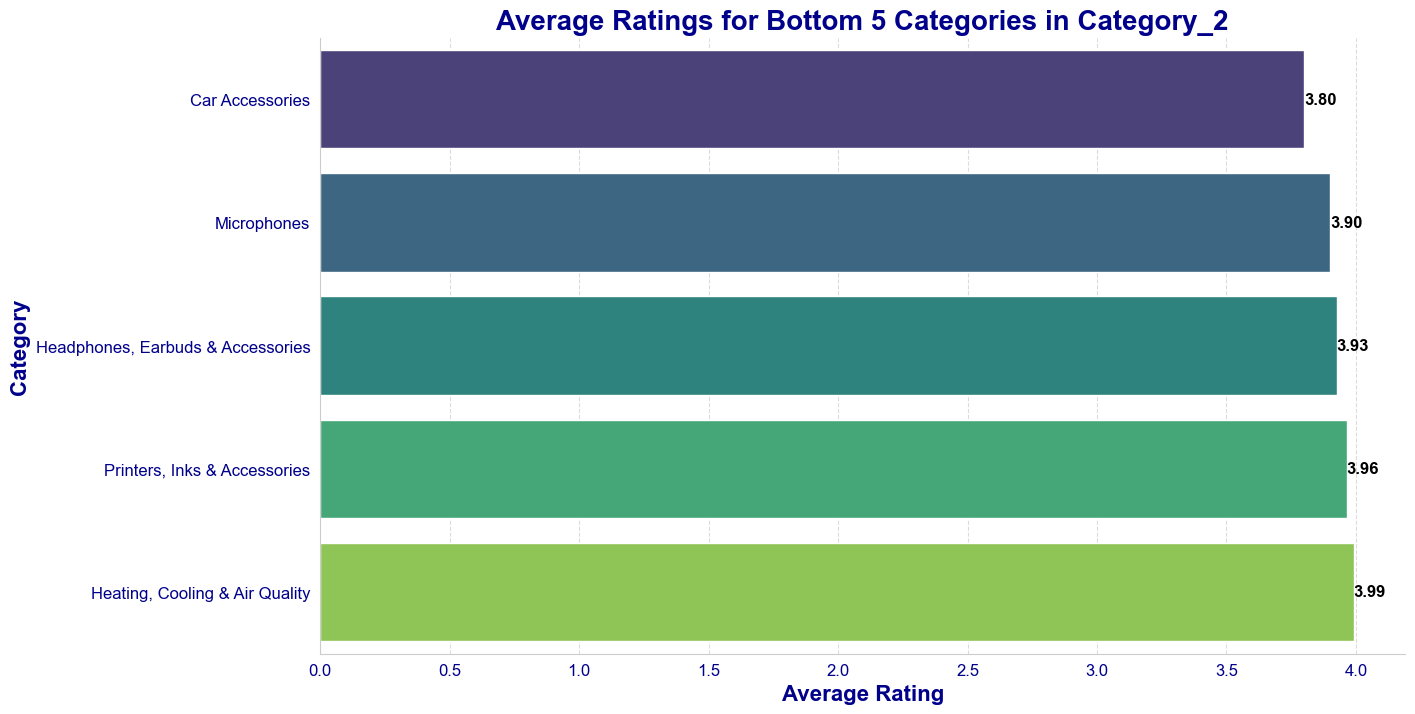

In [65]:
# Group by category and calculate the mean rating
avg_ratings = df1.groupby('category_2')['rating'].mean().reset_index()

# Sort the categories by average rating
avg_ratings = avg_ratings.sort_values(by='rating', ascending=True)

# Select bottom 5 categories
bottom_5_categories = avg_ratings.head(5)

# Plotting the bar plot for bottom 5 categories
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='rating', y='category_2', data=bottom_5_categories, palette='viridis')

# Adding data labels
for index, value in enumerate(bottom_5_categories['rating']):
    ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

# Adding titles and labels
plt.title('Average Ratings for Bottom 5 Categories in Category_2', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Average Rating', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Category', fontsize=16, fontweight='bold', color='darkblue')

# Customize ticks and tick labels
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Remove top and right spines for a cleaner look
sns.despine()

# Adding gridlines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Show the plot
plt.show()

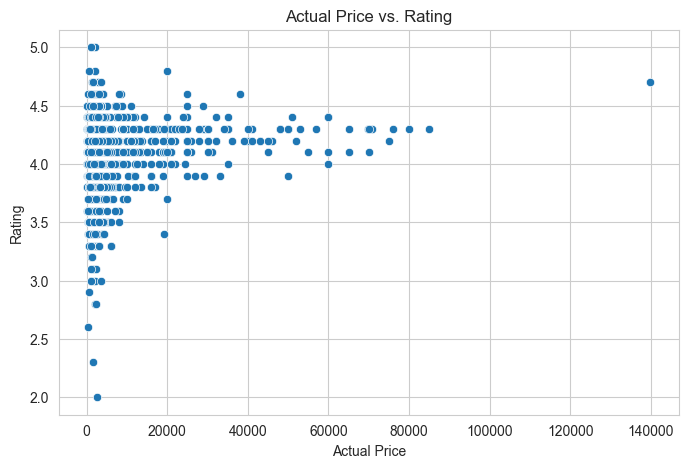

In [66]:
# Scatter plot for actual price vs. rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['actual_price'], y=df['rating'])
plt.title('Actual Price vs. Rating')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.show()


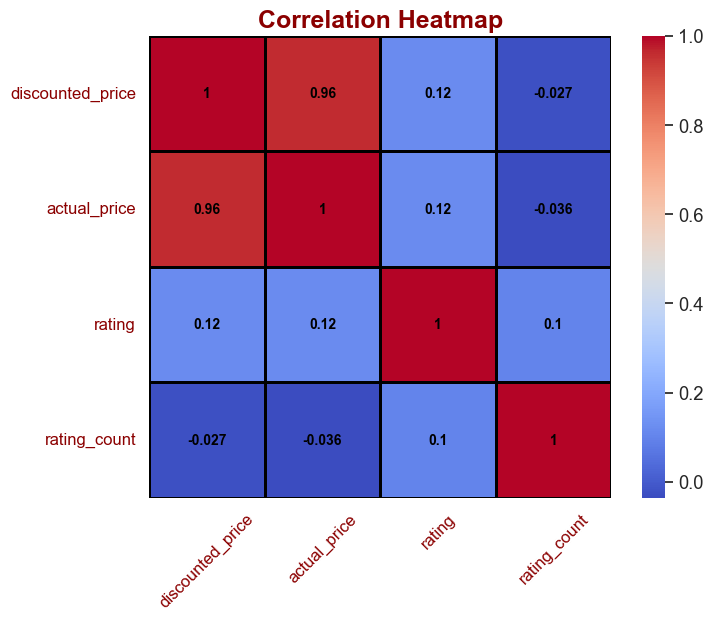

In [67]:
# Create a correlation matrix
corr = df[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=2, linecolor='black', annot_kws={"size": 10, "weight": "bold", "color": "black"})
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', color='darkred')
plt.xticks(fontsize=12, color='darkred', rotation=45)
plt.yticks(fontsize=12, color='darkred', rotation=0)
plt.show()

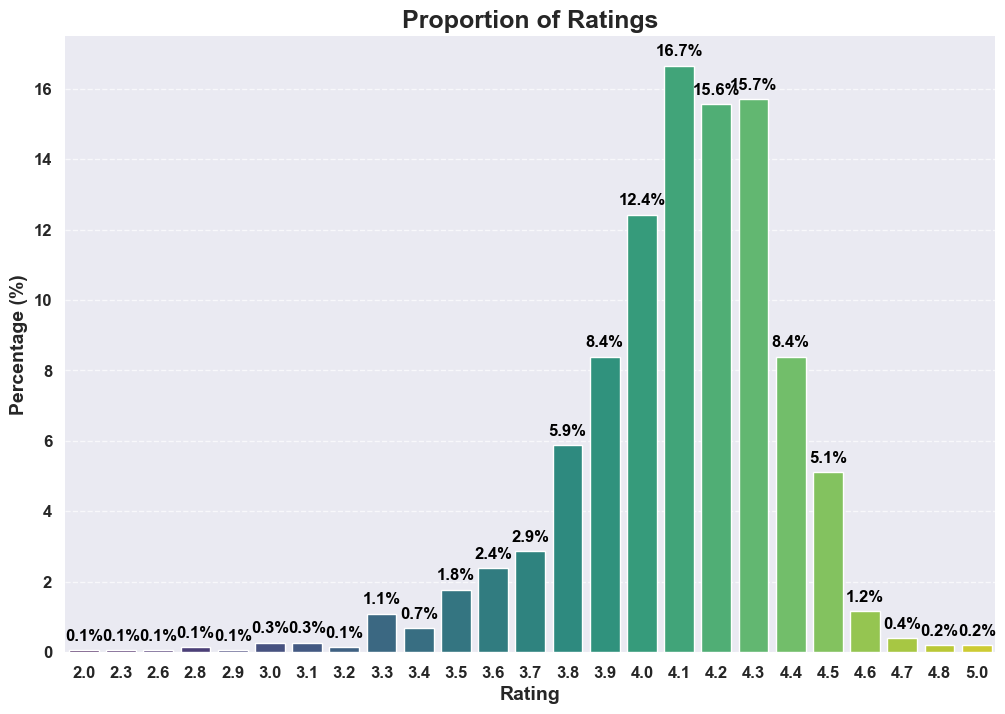

In [68]:
# Counting the occurrences of each rating
rating_counts = df['rating'].value_counts().sort_index()

# Calculate percentage
rating_percentage = (rating_counts / rating_counts.sum()) * 100
# Plotting the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=rating_percentage.index, y=rating_percentage, palette='viridis')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, fontweight='bold', color='black')

# Adding titles and labels
plt.title('Proportion of Ratings', fontsize=18, fontweight='bold')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')

# Adding grid and setting style
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

# Adjusting ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

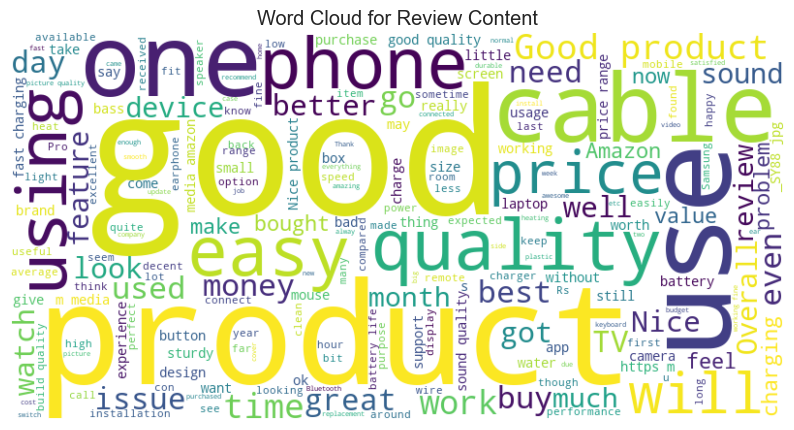

In [69]:
review_text = ' '.join(df['review_content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Content')
plt.show()


In [70]:
# Don't show warnings
import warnings
warnings.filterwarnings('ignore')

## 1. PRODUCT CATEGORY

In [71]:
#Setting Visualization Style

sns.set_style(style='darkgrid')

sns.set_palette(palette="icefire")

In [72]:
#Main Category and Sub-Category

main_sub = df1[['category_1', 'category_2', 'product_id']]

main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})

main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

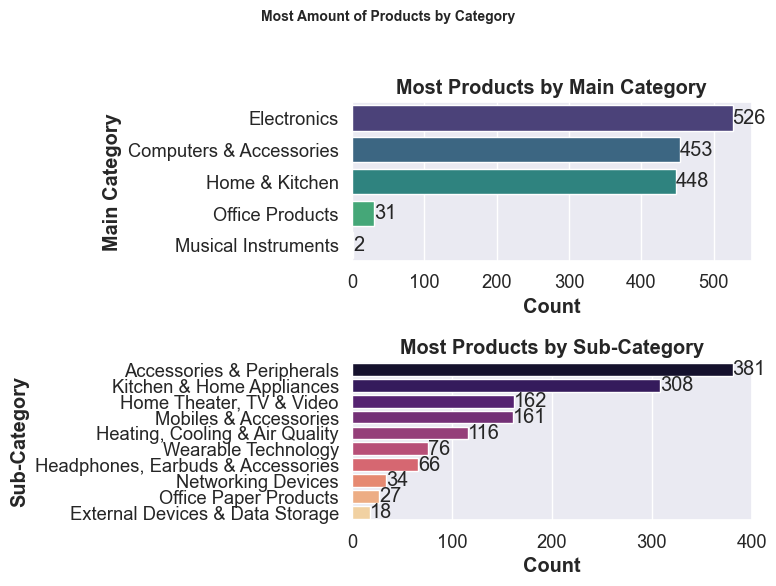

In [73]:
# Most amount of products by category
most_main_items = df1['category_1'].value_counts().head(5).reset_index(name='counts')
most_main_items.columns = ['category_1', 'counts']

most_sub_items = df1['category_2'].value_counts().head(10).reset_index(name='counts')
most_sub_items.columns = ['category_2', 'counts']

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.suptitle('Most Amount of Products by Category', fontweight='bold', size=10)

# Main Category
sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1', palette='viridis')
ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Main Category', fontweight='bold')

# Add data labels
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d')

# Sub-Category
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2', palette='magma')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')
ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Sub-Category', fontweight='bold')

# Add data labels
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

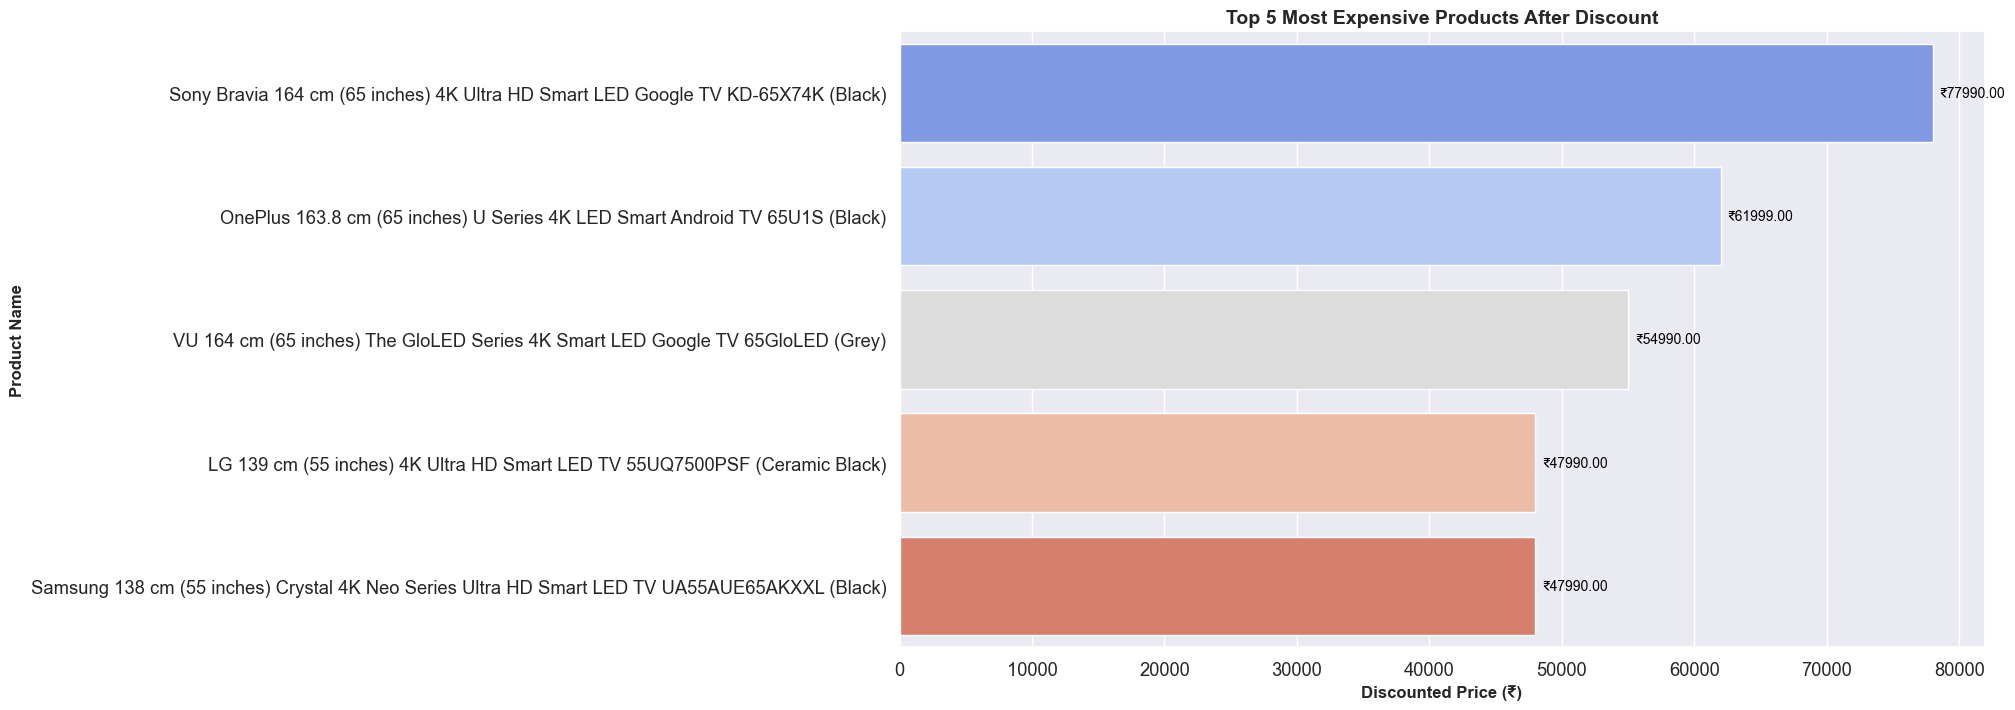

In [74]:
#top 5 most expensive products after the discount
# Sorting and selecting the top 5 most expensive products after discount
top_expensive_products = df1.sort_values('discounted_price', ascending=False).head(5)

# Plotting
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_expensive_products, x='discounted_price', y='product_name', palette='coolwarm')

# Adding titles and labels
ax.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold', fontsize=14)
ax.set_xlabel('Discounted Price (₹)', fontweight='bold', fontsize=12)
ax.set_ylabel('Product Name', fontweight='bold', fontsize=12)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'₹{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

plt.show()

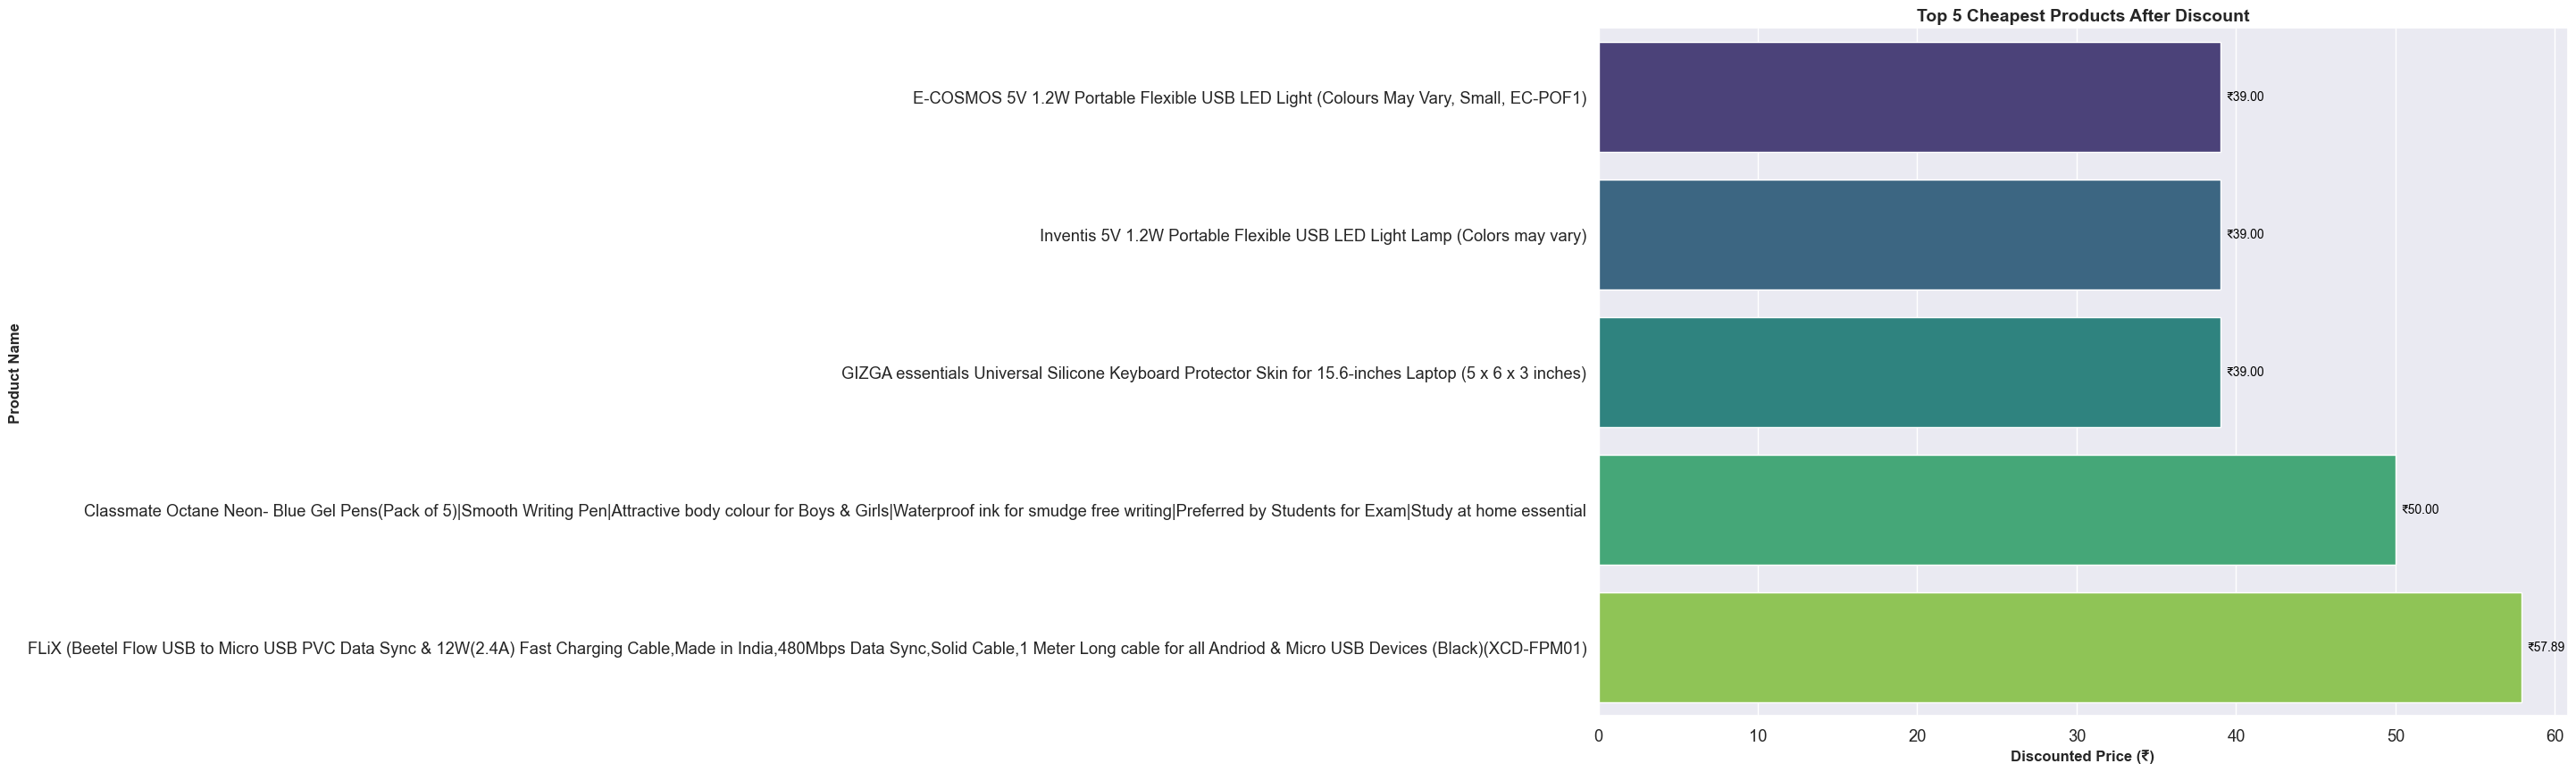

In [75]:
# top 5 cheapest products after the discount
# Sorting and selecting the top 5 cheapest products after discount
top_cheapest_products = df1.sort_values('discounted_price').head(5)

# Plotting
plt.figure(figsize=(14,10))
ax = sns.barplot(data=top_cheapest_products, x='discounted_price', y='product_name', palette='viridis')

# Adding titles and labels
ax.set_title('Top 5 Cheapest Products After Discount', fontweight='bold', fontsize=14)
ax.set_xlabel('Discounted Price (₹)', fontweight='bold', fontsize=12)
ax.set_ylabel('Product Name', fontweight='bold', fontsize=12)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'₹{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

plt.show()

## Product Rating

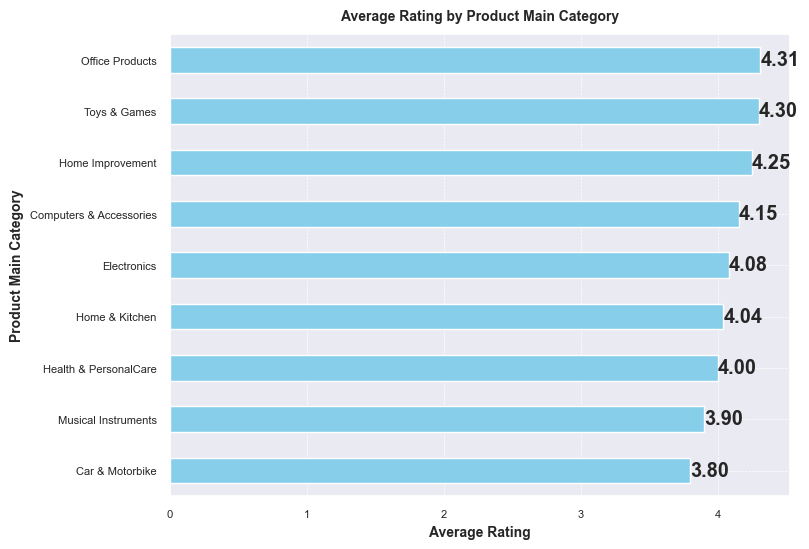

In [76]:
# Grouping the data by category_1 and calculating the mean rating for each category
average_ratings = df1.groupby('category_1')['rating'].mean().sort_values()
# Plotting the average ratings by product main category
plt.figure(figsize=(8, 6))
ax = average_ratings.plot(kind='barh', color='skyblue')

# Adding titles and labels
ax.set_title('Average Rating by Product Main Category', fontweight='bold', fontsize=10, pad=10)
ax.set_xlabel('Average Rating', fontweight='bold', fontsize=10)
ax.set_ylabel('Product Main Category', fontweight='bold', fontsize=10)

# Adding data labels
for index, value in enumerate(average_ratings):
    ax.text(value, index, f'{value:.2f}', va='center', fontweight='bold')

# Customizing ticks
ax.tick_params(axis='both', which='major', labelsize=8)

# Adding gridlines
ax.grid(True, linestyle='--', linewidth=0.5)

plt.show()

In [77]:
#Rating of Products based on Rating Category

rate_main_cat = df1.groupby(['category_1','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat

Main Category Rating Category  Amount
0           Car & Motorbike   Below Average       0
1           Car & Motorbike         Average       1
2           Car & Motorbike   Above Average       0
3           Car & Motorbike       Excellent       0
4   Computers & Accessories   Below Average       0
5   Computers & Accessories         Average      75
6   Computers & Accessories   Above Average     375
7   Computers & Accessories       Excellent       3
8               Electronics   Below Average       1
9               Electronics         Average     132
10              Electronics   Above Average     393
11              Electronics       Excellent       0
12    Health & PersonalCare   Below Average       0
13    Health & PersonalCare         Average       0
14    Health & PersonalCare   Above Average       1
15    Health & PersonalCare       Excellent       0
16           Home & Kitchen   Below Average       5
17           Home & Kitchen         Average     139
18           Home & Kitchen   Above Average     304
19           Home & Kitchen       Excellent       0
20         Home Improvement   Below Average       0
21         Home Improvement         Average       0
22         Home Improvement   Above Average       2
23         Home Improvement       Excellent       0
24      Musical Instruments   Below Average       0
25      Musical Instruments         Average       1
26      Musical Instruments   Above Average       1
27      Musical Instruments       Excellent       0
28          Office Products   Below Average       0
29          Office Products         Average       0
30          Office Products   Above Average      31
31          Office Products       Excellent       0
32             Toys & Games   Below Average       0
33             Toys & Games         Average       0
34             Toys & Games   Above Average       1
35             Toys & Games       Excellent       0

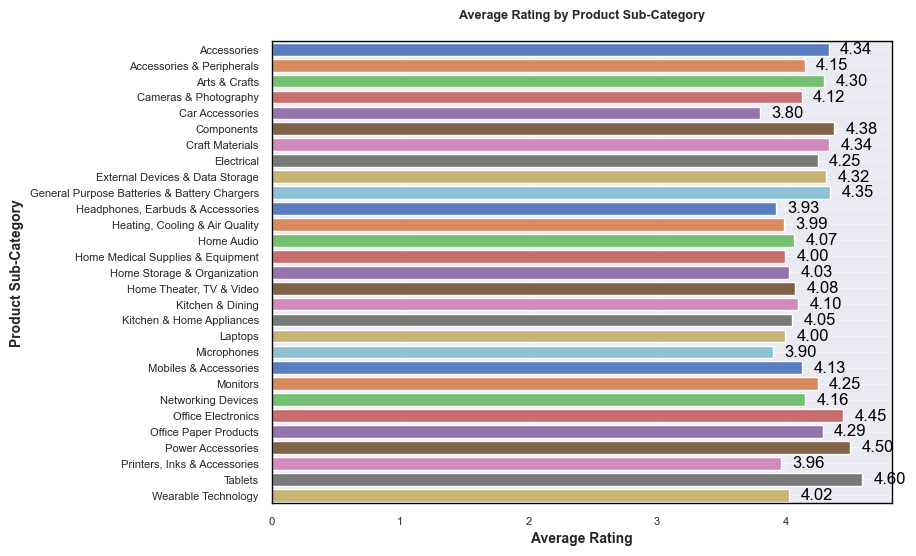

In [78]:
#average rating of product sub-category
avg_rating_per_sub_category = df1.groupby('category_2')['rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=avg_rating_per_sub_category, x='rating', y='category_2', palette='muted')
ax.set_title('Average Rating by Product Sub-Category', fontweight='bold', fontsize=9, pad=16)
ax.set_xlabel('Average Rating', fontweight='bold', fontsize=10)
ax.set_ylabel('Product Sub-Category', fontweight='bold', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', xytext = (20, 0), textcoords = 'offset points', fontsize=12, color='black')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.grid(True, linestyle='--', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
plt.show()

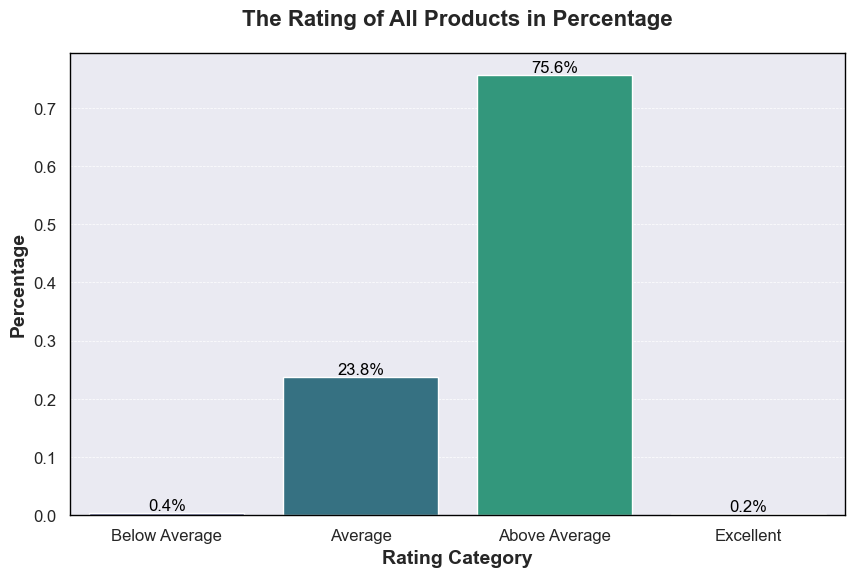

In [79]:
# Ensure the ratings are ordered correctly
rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']
rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')
rating_count['counts'] = rating_count['counts'].round(3)
rating_count = rating_count.set_index('rating').reindex(rating_ordered).reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=rating_count, x='rating', y='counts', palette='viridis', order=rating_ordered)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Adding titles and labels
ax.set_title('The Rating of All Products in Percentage', fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('Rating Category', fontweight='bold', fontsize=14)
ax.set_ylabel('Percentage', fontweight='bold', fontsize=14)

# Customizing ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Adding gridlines
ax.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Adding a box around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Display the plot
plt.show()

# Reviewrs

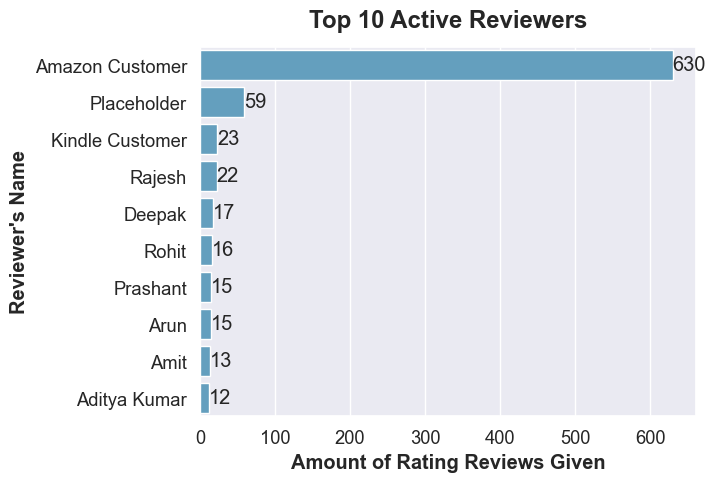

In [80]:
#Reviewers who gave ratings and reviews for more than one product

top_reviewer = data=df2['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='large', y=1.03)

plt.show()

# Product Pricing

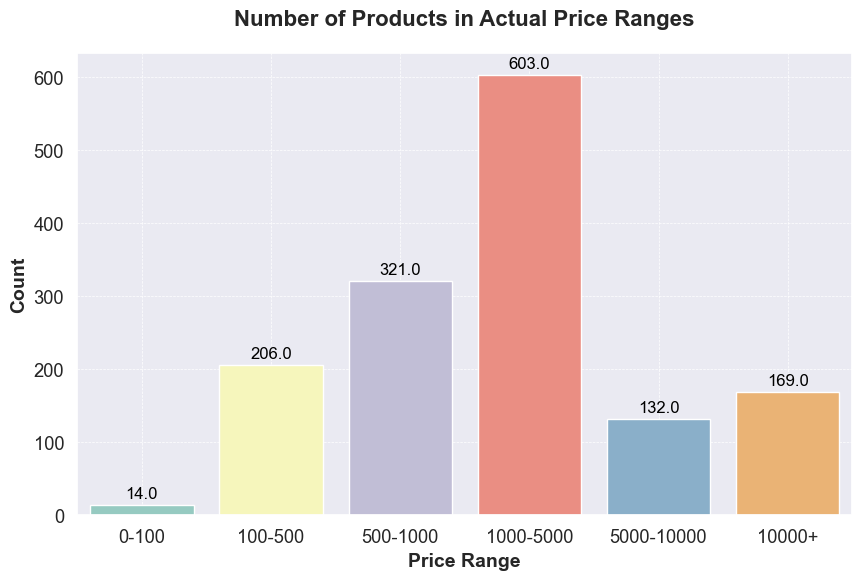

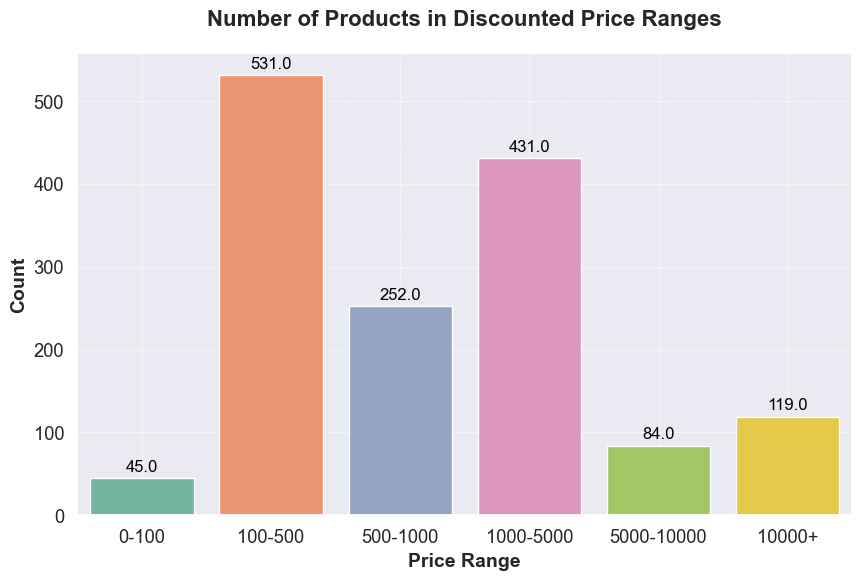

In [81]:
# Define price bins and labels
price_bins = [0, 100, 500, 1000, 5000, 10000, 50000]
price_labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']

# Categorize actual and discounted prices into bins
df['actual_price_range'] = pd.cut(df['actual_price'], bins=price_bins, labels=price_labels)
df['discounted_price_range'] = pd.cut(df['discounted_price'], bins=price_bins, labels=price_labels)

# Function to plot bar chart
def plot_bar(data, title, palette):
    counts = data.value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts.index, y=counts.values, palette=palette)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    ax.set_title(title, fontweight='bold', fontsize=16, pad=20)
    ax.set_xlabel('Price Range', fontweight='bold', fontsize=14)
    ax.set_ylabel('Count', fontweight='bold', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

# Plot Actual Price Range
plot_bar(df['actual_price_range'], 'Number of Products in Actual Price Ranges', 'Set3')

# Plot Discounted Price Range
plot_bar(df['discounted_price_range'], 'Number of Products in Discounted Price Ranges', 'Set2')

## STATISTICAL TEST

In [82]:
# Encode categorical variables for the chi-square test
df['category_encoded'] = df['category'].astype('category').cat.codes
df['rating_encoded'] = df['rating'].astype('category').cat.codes

## ANNOVA TEST

In [83]:
anova_result = stats.f_oneway(
    df[df['category'] == df['category'].unique()[0]]['actual_price'],
    df[df['category'] == df['category'].unique()[1]]['actual_price'],
    df[df['category'] == df['category'].unique()[2]]['actual_price'],
    df[df['category'] == df['category'].unique()[3]]['actual_price'],
    df[df['category'] == df['category'].unique()[4]]['actual_price']
)

print(f"ANOVA Test Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA Test Result: F-statistic = 259.79595067253746, p-value = 1.46581365477826e-107


## Chi- Square Test

In [84]:
contingency_table = pd.crosstab(df['category_encoded'], df['rating_encoded'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Result: chi2 = {chi2}, p-value = {p}")

Chi-Square Test Result: chi2 = 4809.802217513787, p-value = 0.9898842645035582


## Correlation Test

In [85]:
corr, p_value = pearsonr(df['actual_price'], df['rating'])

print(f"Correlation Test Result: correlation coefficient = {corr}, p-value = {p_value}")

Correlation Test Result: correlation coefficient = 0.12169536239414404, p-value = 2.9926381923963043e-06


## Comparing the tests

In [86]:
# Displaying results
results = pd.DataFrame({
    'Test': ['ANOVA', 'Chi-Square', 'Correlation'],
    'Statistic': [anova_result.statistic if anova_result else np.nan, chi2, corr],
    'p-value': [anova_result.pvalue if anova_result else np.nan, p, p_value]
})

# Drop NaN values for plotting
results.dropna(inplace=True)
print(results)


          Test    Statistic        p-value
0        ANOVA   259.795951  1.465814e-107
1   Chi-Square  4809.802218   9.898843e-01
2  Correlation     0.121695   2.992638e-06


## Plotting the comparison

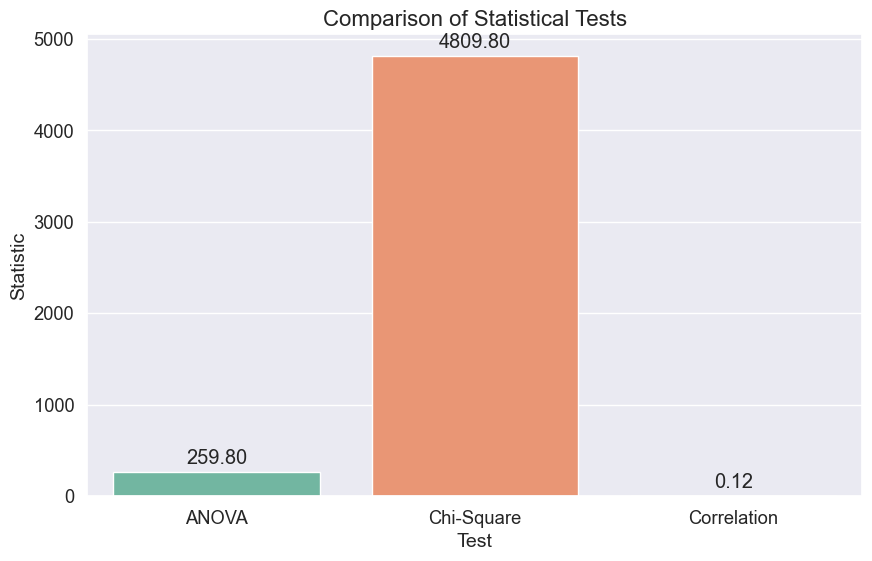

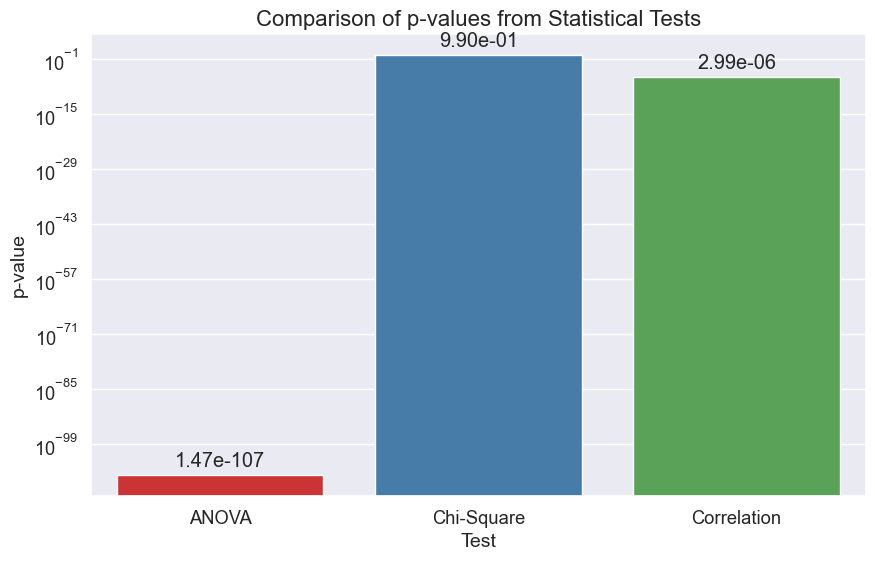

In [87]:
# Plotting the results
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Test', y='Statistic', data=results, palette='Set2')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Statistical Tests', fontsize=16)
plt.xlabel('Test', fontsize=14)
plt.ylabel('Statistic', fontsize=14)
plt.show()

# Plotting p-values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Test', y='p-value', data=results, palette='Set1')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of p-values from Statistical Tests', fontsize=16)
plt.xlabel('Test', fontsize=14)
plt.ylabel('p-value', fontsize=14)
plt.yscale('log')
plt.show()

                      Test    Statistic       p-value
0                   T-Test    -3.727392  2.394949e-04
1           Mann-Whitney U  1232.000000  3.471038e-03
2           Kruskal-Wallis     9.048308  1.084389e-02
3     Spearman Correlation     0.033203  2.040478e-01
4  Kendall Tau Correlation     0.025966  1.607265e-01
5             Shapiro-Wilk     0.482646  5.413778e-54


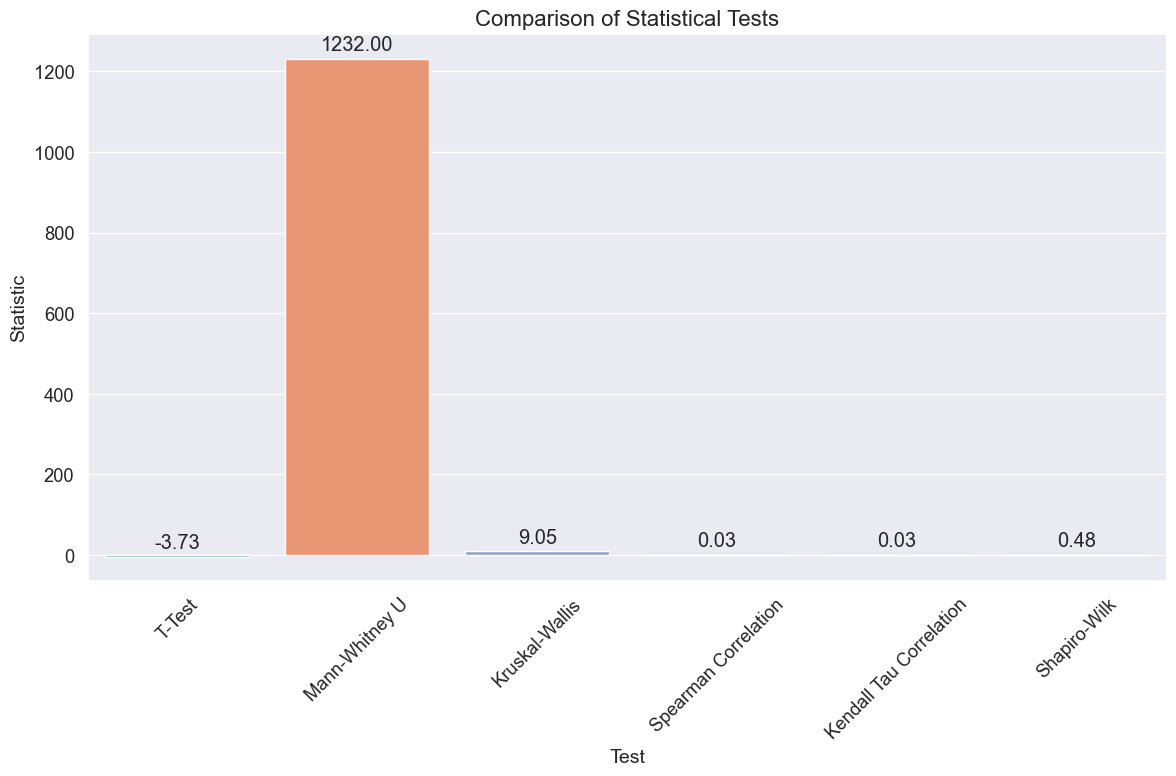

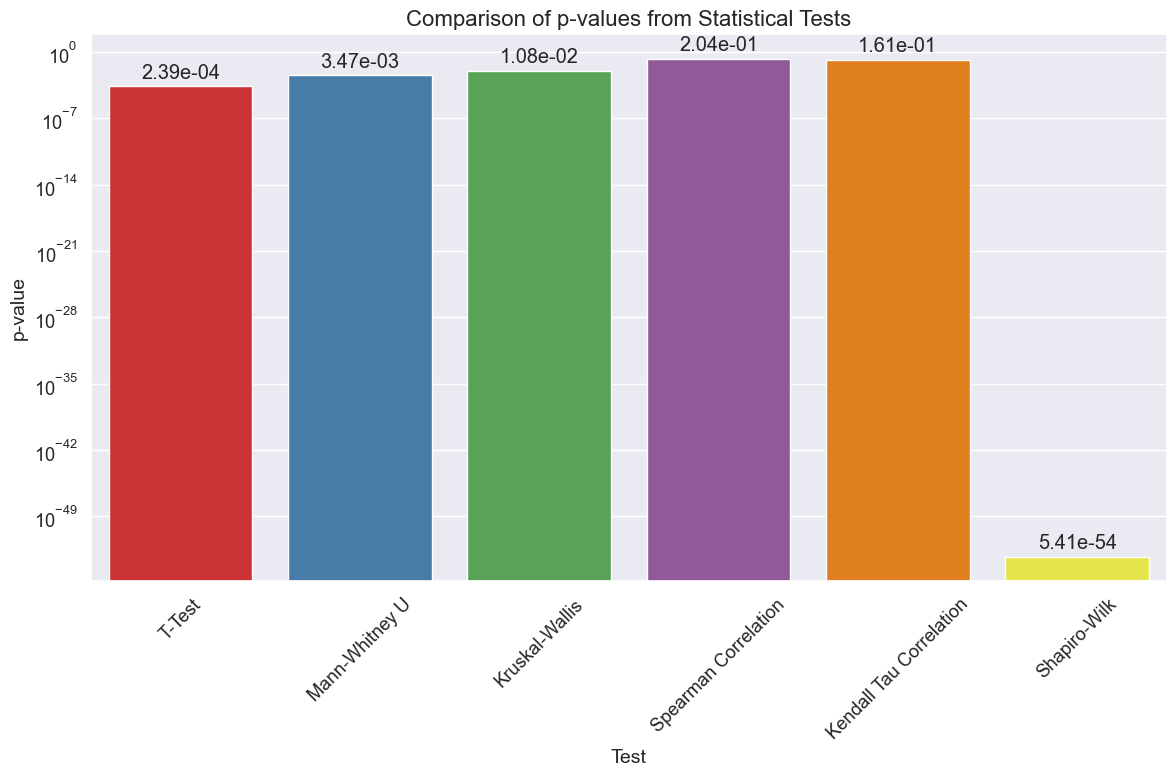

In [88]:
# T-Test
ttest_result = stats.ttest_ind(
    df[df['category'] == df['category'].unique()[0]]['actual_price'],
    df[df['category'] == df['category'].unique()[1]]['actual_price']
)

# Mann-Whitney U Test
mannwhitney_result = mannwhitneyu(
    df[df['category'] == df['category'].unique()[0]]['actual_price'],
    df[df['category'] == df['category'].unique()[1]]['actual_price']
)

# Kruskal-Wallis H Test
kruskal_result = kruskal(
    df[df['category'] == df['category'].unique()[0]]['actual_price'],
    df[df['category'] == df['category'].unique()[1]]['actual_price'],
    df[df['category'] == df['category'].unique()[2]]['actual_price']
)

# Spearman Rank Correlation
spearman_corr, spearman_p = spearmanr(df['actual_price'], df['rating'])

# Kendall Tau Correlation
kendall_corr, kendall_p = kendalltau(df['actual_price'], df['rating'])

# Shapiro-Wilk Test for Normality
shapiro_result = shapiro(df['actual_price'])

# Results
results = pd.DataFrame({
    'Test': ['T-Test', 'Mann-Whitney U', 'Kruskal-Wallis', 'Spearman Correlation', 'Kendall Tau Correlation', 'Shapiro-Wilk'],
    'Statistic': [ttest_result.statistic, mannwhitney_result.statistic, kruskal_result.statistic, spearman_corr, kendall_corr, shapiro_result.statistic],
    'p-value': [ttest_result.pvalue, mannwhitney_result.pvalue, kruskal_result.pvalue, spearman_p, kendall_p, shapiro_result.pvalue]
})
print(results)

# Plotting the results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Test', y='Statistic', data=results, palette='Set2')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Statistical Tests', fontsize=16)
plt.xlabel('Test', fontsize=14)
plt.ylabel('Statistic', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting p-values
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Test', y='p-value', data=results, palette='Set1')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of p-values from Statistical Tests', fontsize=16)
plt.xlabel('Test', fontsize=14)
plt.ylabel('p-value', fontsize=14)
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [89]:

# Get the number of columns
num_columns = df.shape[1]
print(f"The number of columns in the dataset is: {num_columns}")
print("The column names are:")
print(df.columns)


The number of columns in the dataset is: 23
The column names are:
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_rank',
       'sales_date', 'month_year', 'actual_price_range',
       'discounted_price_range', 'category_encoded', 'rating_encoded'],
      dtype='object')


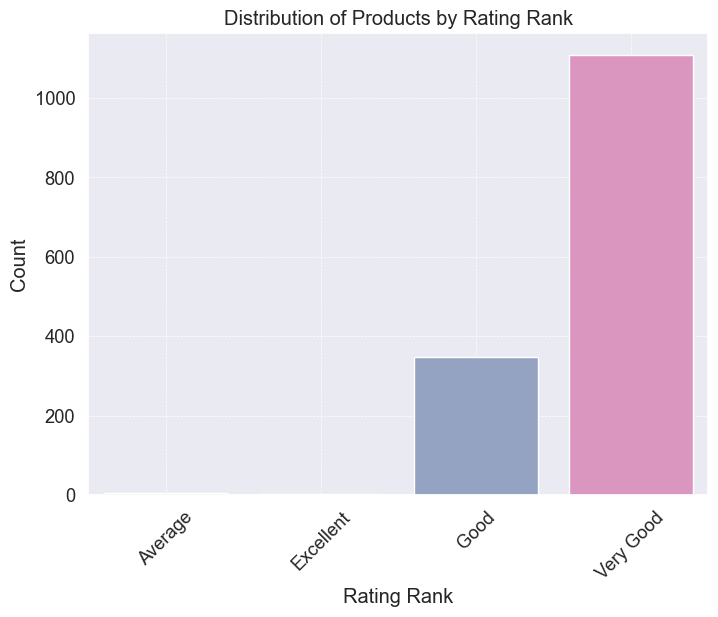

In [90]:
# Bar Plot of Rating Rank Counts
plt.figure(figsize=(8, 6))
sns.countplot(x='rating_rank', data=df, palette='Set2')
plt.title('Distribution of Products by Rating Rank')
plt.xlabel('Rating Rank')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

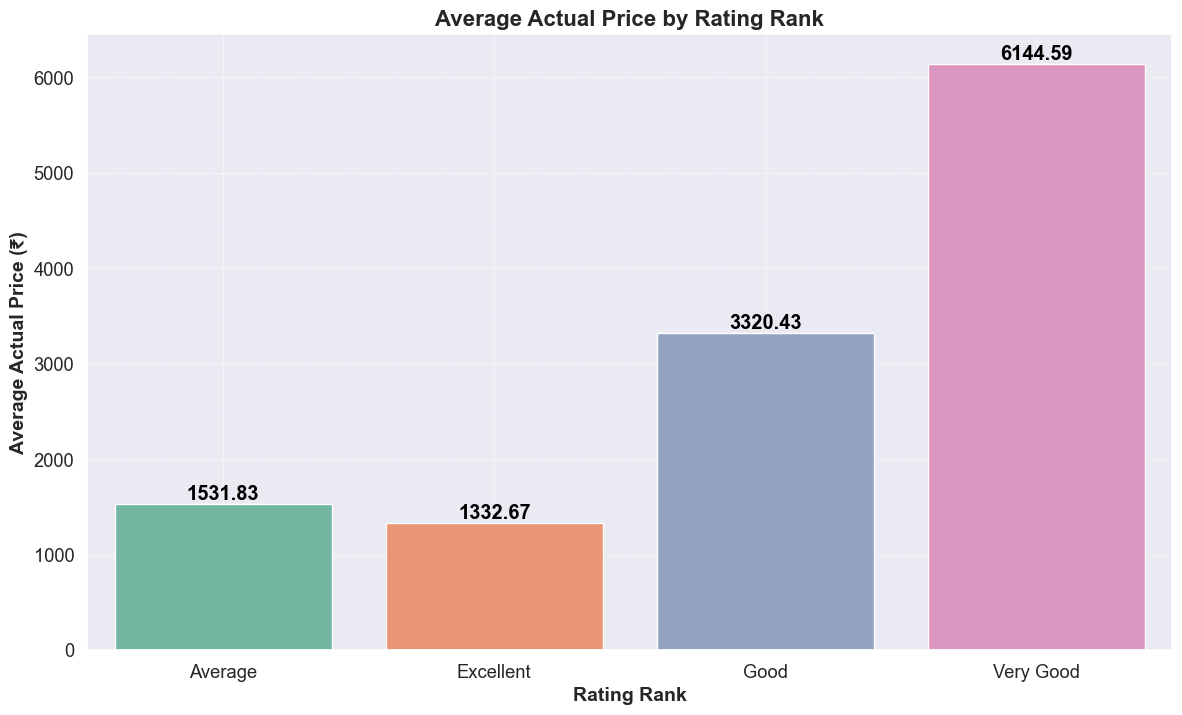

In [91]:
# Calculate the average actual price by rating rank
avg_price_by_rank = df.groupby('rating_rank')['actual_price'].mean().reset_index()

# Bar Plot of Average Actual Price by Rating Rank
plt.figure(figsize=(14, 8))
sns.barplot(x='rating_rank', y='actual_price', data=avg_price_by_rank, palette='Set2')

# Adding titles and labels
plt.title('Average Actual Price by Rating Rank', fontsize=16, fontweight='bold')
plt.xlabel('Rating Rank', fontsize=14, fontweight='bold')
plt.ylabel('Average Actual Price (₹)', fontsize=14, fontweight='bold')

# Adding data labels
for index, row in avg_price_by_rank.iterrows():
    plt.text(index, row.actual_price, round(row.actual_price, 2), color='black', ha="center", va="bottom", fontweight='bold')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

## Model Evaluation for E-Commerce Prediction

In [92]:
# Get the number of columns
num_columns = df.shape[1]
print(f"The number of columns in the dataset is: {num_columns}")
print("The column names are:")
print(df.columns)

The number of columns in the dataset is: 23
The column names are:
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_rank',
       'sales_date', 'month_year', 'actual_price_range',
       'discounted_price_range', 'category_encoded', 'rating_encoded'],
      dtype='object')


## 1. Sentiment Analysis

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                              cleaned_review_content sentiment  compound  
0  looks durable charging fine toono complains ch...  positive    0.9574  
1  ordered cable connect phone android auto car c...  positive    0.9895  
2  quite durable sturdy https working good https ...  positive    0.8625  
3  good product long wire charges good nice bough...  positive    0.9723  
4  bought instead original apple work fast apple ...  positive    0.9957  


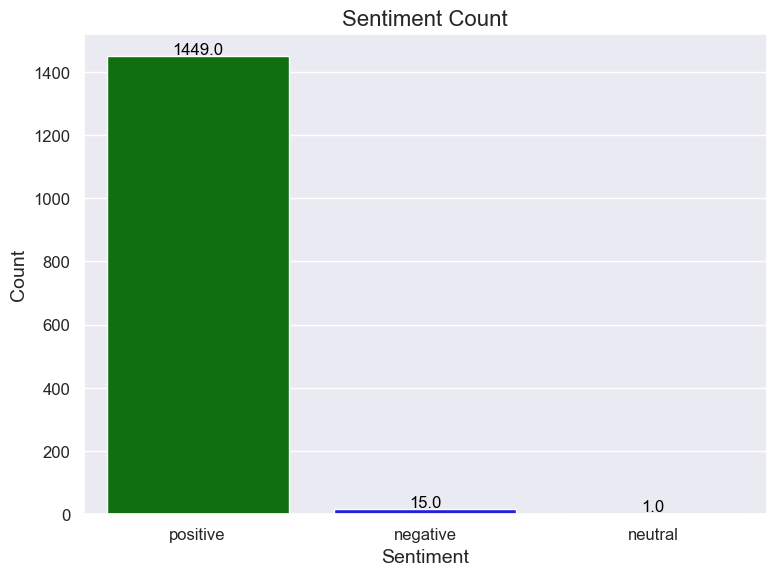

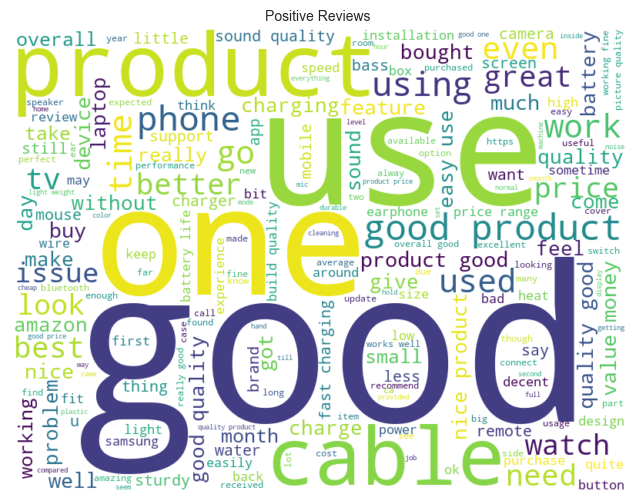

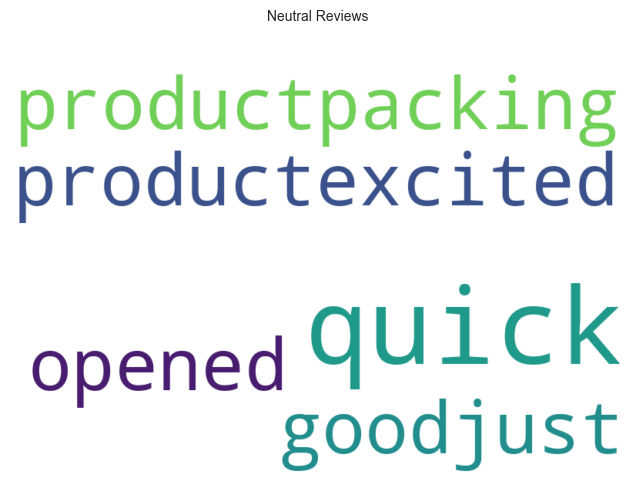

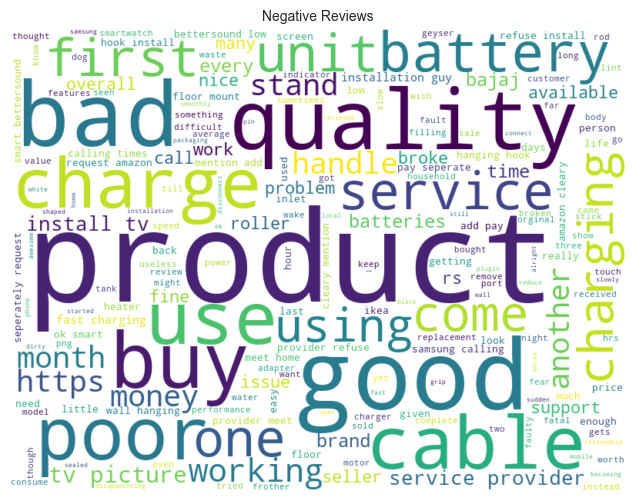

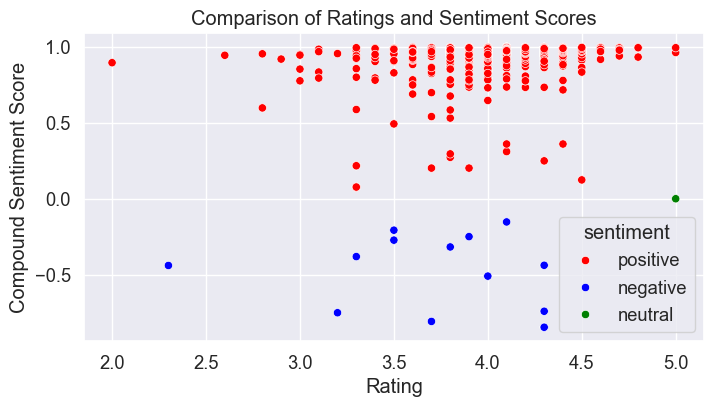

Correlation between rating and sentiment compound score:
             rating  compound
rating    1.000000  0.197989
compound  0.197989  1.000000
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
MSE: 0.01
MAE: 0.01
ROC AUC: 1.00
Confusion Matrix:
[[  2   3]
 [  0 288]]


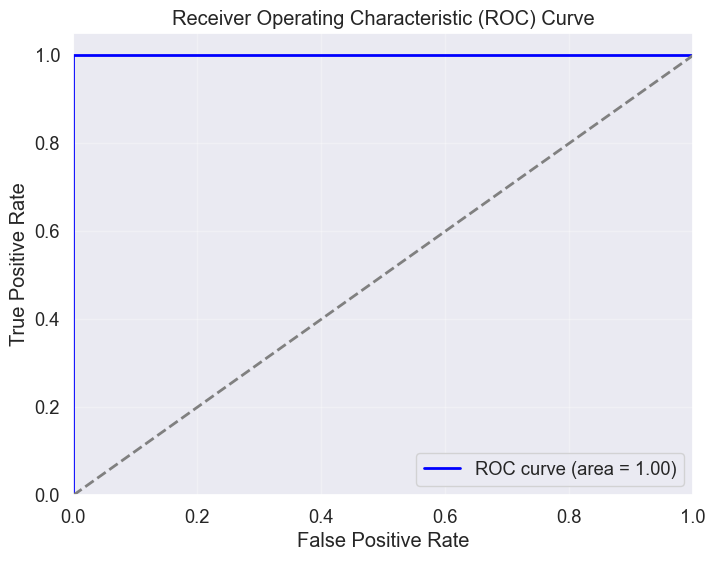

In [93]:
# Extract the review content
df['review_content'] = df['review_content'].astype(str)  # Ensure review content is in string format

# Initialize VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess review content
df['cleaned_review_content'] = df['review_content'].apply(preprocess_text)

# Perform sentiment analysis
df['sentiment_scores'] = df['cleaned_review_content'].apply(lambda x: sid.polarity_scores(x))
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

#updated data frame with sentiment scores
print(df[['review_content', 'cleaned_review_content', 'sentiment', 'compound']].head())

# Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment', data=df, palette=['green', 'blue', 'red'])
plt.title('Sentiment Count', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

def plot_wordcloud(text, title, color):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color, width=800, height=600).generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Combining reviews for each sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review_content'])
neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['cleaned_review_content'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review_content'])

# word clouds
plot_wordcloud(positive_reviews, 'Positive Reviews', 'white')
plot_wordcloud(neutral_reviews, 'Neutral Reviews', 'white')
plot_wordcloud(negative_reviews, 'Negative Reviews', 'white')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop any rows with missing values in 'rating' or 'compound'
df.dropna(subset=['rating', 'compound'], inplace=True)

# Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='rating', y='compound', data=df, hue='sentiment', palette=['red', 'blue', 'green'])
plt.title('Comparison of Ratings and Sentiment Scores')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

# Correlation Analysis
correlation = df[['rating', 'compound']].corr()
print("Correlation between rating and sentiment compound score:\n", correlation)

# Convert sentiment to binary labels
df['binary_sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

X = df[['compound']]
y = df['binary_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting probabilities and classes
y_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


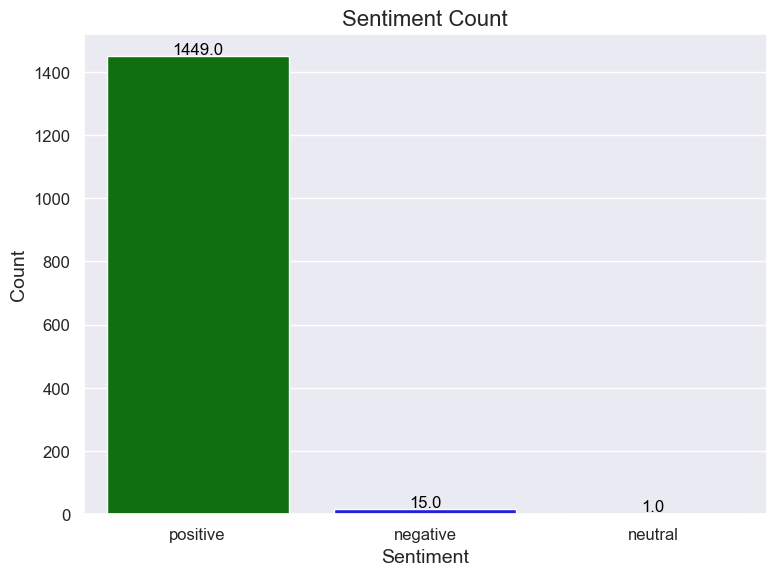

In [94]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment', data=df, palette=['green', 'blue', 'red'])
plt.title('Sentiment Count', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

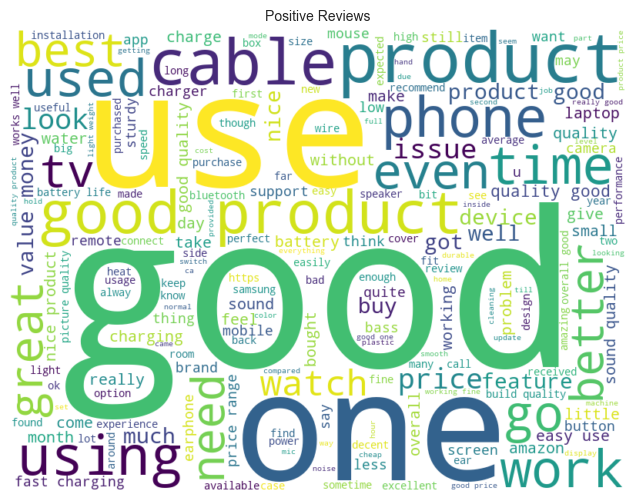

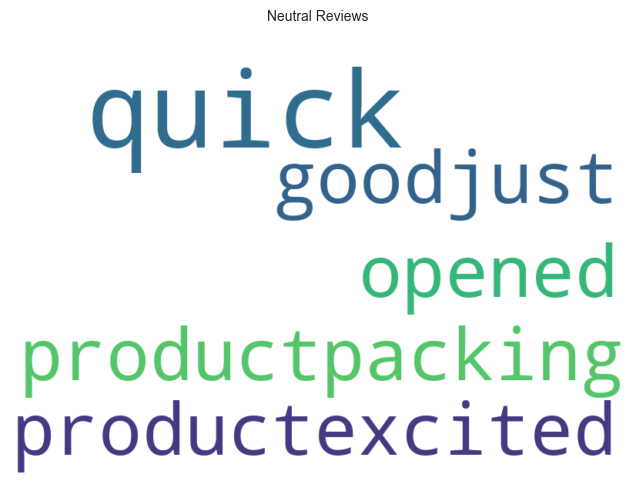

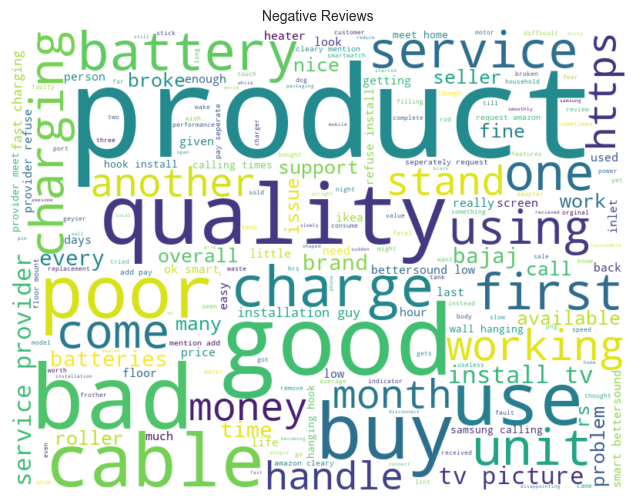

In [95]:
def plot_wordcloud(text, title, color):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color, width=800, height=600).generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# Combine all reviews for each sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review_content'])
neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['cleaned_review_content'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review_content'])

# Plot word clouds
plot_wordcloud(positive_reviews, 'Positive Reviews', 'white')
plot_wordcloud(neutral_reviews, 'Neutral Reviews', 'white')
plot_wordcloud(negative_reviews, 'Negative Reviews', 'white')

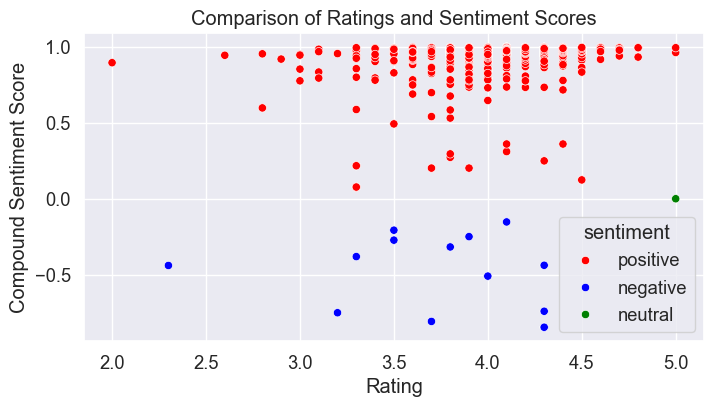

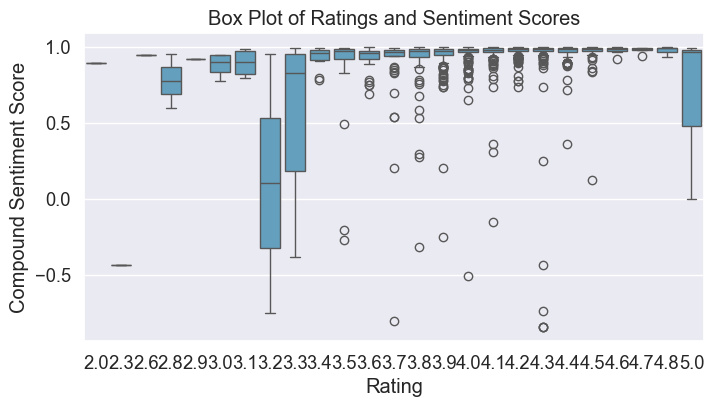

Correlation between rating and sentiment compound score:
             rating  compound
rating    1.000000  0.197989
compound  0.197989  1.000000


In [96]:

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Dropping rows with missing values
df.dropna(subset=['rating', 'compound'], inplace=True)

# Scatter Plot to Compare Rating and Sentiment Compound Scores
plt.figure(figsize=(8, 4))
sns.scatterplot(x='rating', y='compound', data=df, hue='sentiment', palette=['red', 'blue', 'green'])
plt.title('Comparison of Ratings and Sentiment Scores')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

# Box Plot to Compare Rating and Sentiment Compound Scores
plt.figure(figsize=(8, 4))
sns.boxplot(x='rating', y='compound', data=df)
plt.title('Box Plot of Ratings and Sentiment Scores')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

# Correlation Analysis
correlation = df[['rating', 'compound']].corr()
print("Correlation between rating and sentiment compound score:\n", correlation)

# 2. Price Prediction

In [97]:
# Create a new column for the price difference
df['price_difference'] = df['actual_price'] - df['discounted_price']

# Select relevant features for further tasks
df = df[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count', 'price_difference']]
df.head()

actual_price  discounted_price  discount_percentage  rating  rating_count  \
0        1099.0             399.0                 0.64     4.2       24269.0   
1         349.0             199.0                 0.43     4.0       43994.0   
2        1899.0             199.0                 0.90     3.9        7928.0   
3         699.0             329.0                 0.53     4.2       94363.0   
4         399.0             154.0                 0.61     4.2       16905.0   

   price_difference  
0             700.0  
1             150.0  
2            1700.0  
3             370.0  
4             245.0

In [98]:
# Define features and target
features = ['actual_price', 'discount_percentage', 'rating', 'rating_count']
target = 'discounted_price'
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000),
    "Support Vector Machine": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "Explained Variance Score": evs}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}, Explained Variance Score: {evs:.2f}")

Linear Regression - MSE: 3271169.00, RMSE: 1808.64, MAE: 815.29, R2: 0.94, Explained Variance Score: 0.94
Decision Tree - MSE: 1245712.21, RMSE: 1116.11, MAE: 244.80, R2: 0.98, Explained Variance Score: 0.98
Random Forest - MSE: 971338.67, RMSE: 985.57, MAE: 185.37, R2: 0.98, Explained Variance Score: 0.98
Gradient Boosting - MSE: 989627.09, RMSE: 994.80, MAE: 240.78, R2: 0.98, Explained Variance Score: 0.98
XGBoost - MSE: 1089956.93, RMSE: 1044.01, MAE: 201.84, R2: 0.98, Explained Variance Score: 0.98
Neural Network - MSE: 3932893.97, RMSE: 1983.15, MAE: 774.47, R2: 0.92, Explained Variance Score: 0.92
Support Vector Machine - MSE: 55892765.86, RMSE: 7476.15, MAE: 2816.24, R2: -0.11, Explained Variance Score: 0.01


## Plotting MSE values of the model.

<Figure size 1400x800 with 0 Axes>

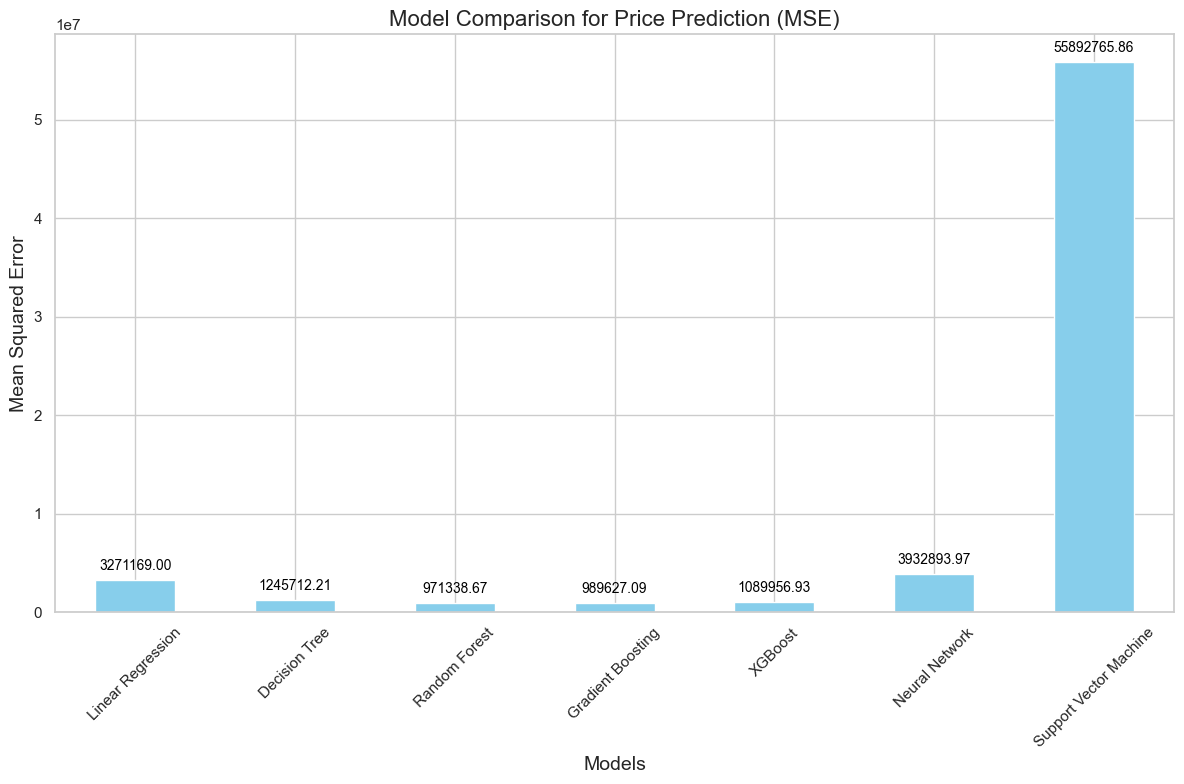

In [99]:
# Given MSE results
mse_results = {
    "Linear Regression": 3271169.00,
    "Decision Tree": 1245712.21,
    "Random Forest": 971338.67,
    "Gradient Boosting": 989627.09,
    "XGBoost": 1089956.93,
    "Neural Network": 3932893.97,
    "Support Vector Machine": 55892765.86
}

# Convert the results to a DataFrame
mse_df = pd.DataFrame(mse_results, index=['MSE']).T

# Plotting with aesthetics
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
ax = mse_df.plot(kind='bar', legend=False, figsize=(12, 8), color='skyblue')
ax.set_title('Model Comparison for Price Prediction (MSE)', fontsize=16)
ax.set_ylabel('Mean Squared Error', fontsize=14)
ax.set_xlabel('Models', fontsize=14)

# Add MSE data labels
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Only label bars with non-zero height for MSE
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
# Get the number of columns
num_columns = df.shape[1]
print(f"The number of columns in the dataset is: {num_columns}")
print("The column names are:")
print(df.columns)

The number of columns in the dataset is: 6
The column names are:
Index(['actual_price', 'discounted_price', 'discount_percentage', 'rating',
       'rating_count', 'price_difference'],
      dtype='object')


In [107]:
# Create binary target variable for logistic regression
df_no_outliers['discount_binary'] = np.where(df_no_outliers['discounted_price'] < df_no_outliers['actual_price'], 1, 0)

# Features and target
features = ['actual_price', 'discount_percentage', 'rating', 'rating_count']
target_reg = 'discounted_price'
target_class = 'discount_binary'

X = df_no_outliers[features]
y_reg = df_no_outliers[target_reg]
y_class = df_no_outliers[target_class]

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [108]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [109]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [110]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)


In [111]:
nn_reg = MLPRegressor(random_state=42, max_iter=1000)
nn_reg.fit(X_train, y_train)
y_pred_nn = nn_reg.predict(X_test)


In [112]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_class, y_train_class)
y_pred_log_reg = log_reg.predict(X_test_class)


In [113]:
# Regression metrics
models_reg = {
    "Linear Regression": y_pred_lin,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Neural Network": y_pred_nn
}

metrics_reg = {}
for name, y_pred in models_reg.items():
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    metrics_reg[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

metrics_reg_df = pd.DataFrame(metrics_reg).T
print(metrics_reg_df)

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_log_reg)
precision = precision_score(y_test_class, y_pred_log_reg)
recall = recall_score(y_test_class, y_pred_log_reg)
f1 = f1_score(y_test_class, y_pred_log_reg)
roc_auc = roc_auc_score(y_test_class, log_reg.predict_proba(X_test_class)[:, 1])

metrics_class = {
    "Logistic Regression": {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }
}

metrics_class_df = pd.DataFrame(metrics_class).T
print(metrics_class_df)


ValueError: Found input variables with inconsistent numbers of samples: [236, 293]